In [1]:
import numpy as np
from numpy import random
from scipy import stats


import matplotlib.pylab as pl
import matplotlib.ticker as ptick
from matplotlib import cm

import copy
import os
import importlib as imp
from itertools import product


import dyn_funcs as dyf
import suscept_funcs as sf

In [2]:
N=512*1
sigma=0.01
f_d_ratio=sigma**2/2
ADR=os.environ['HOME']+"/Dropbox/research/programs/Bif_Anlys/16th_data/"
tset=["o","x","^","<",">"]
cset=["magenta","b","y","r","black"]


### evaluation of diff between G^-1 and 2/(G+G^t)

In [3]:
N=512
inet=0
type_J="random_sym"
tmp=np.load(ADR+"spn_rndJ_N512_inet%d.npz"%inet,allow_pickle=True)
dyn_noise_all,J,list_beta=tmp["dyn"],tmp["J"],tmp["list_beta"]
norm_cov=np.cov(dyn_noise_all[0,5000:].T)/f_d_ratio

J=sf.gen_J(N,type_J,inet)
eigs=np.linalg.eig(J)

In [4]:
#  check cov xi and var xi
xi=eigs[1][:,:1].real
prjdyn=dyn_noise_all[0,:,:]@xi
var=np.var(prjdyn[5000:])/f_d_ratio
covxi=norm_cov@xi

In [12]:
%matplotlib qt
#pl.plot(covxi[:,0])
#pl.plot(var*xi)
pl.scatter(covxi[:,0],var*xi)

In [13]:
%matplotlib inline

In [14]:
np.conjugate(1+1j)

(1-1j)

In [44]:
N=512*4
inet=0
type_J="random_asym"
J=sf.gen_J(N,type_J,inet)
eigs=np.linalg.eig(J)

In [45]:
tmp=[]
for i in range(N//2):
    p=eigs[1][:,2*i:2*i+1]
    norm=np.sum((p.real)**2)
    tmp.append(norm)

(array([  2.,   1.,   3.,   2.,   5.,  26.,  81., 301., 282., 110.,  47.,
         28.,  12.,  22.,  16.,   7.,   7.,   6.,   8.,   4.,   3.,   2.,
          2.,   3.,   2.,   1.,   3.,   1.,   2.,   2.,   1.,   2.,   1.,
          0.,   1.,   2.,   1.,   0.,   2.,   0.,   2.,   1.,   2.,   0.,
          0.,   0.,   0.,   2.,   0.,  16.]),
 array([0.40673446, 0.41859977, 0.43046508, 0.44233039, 0.4541957 ,
        0.46606101, 0.47792632, 0.48979163, 0.50165694, 0.51352226,
        0.52538757, 0.53725288, 0.54911819, 0.5609835 , 0.57284881,
        0.58471412, 0.59657943, 0.60844474, 0.62031005, 0.63217536,
        0.64404067, 0.65590599, 0.6677713 , 0.67963661, 0.69150192,
        0.70336723, 0.71523254, 0.72709785, 0.73896316, 0.75082847,
        0.76269378, 0.77455909, 0.7864244 , 0.79828972, 0.81015503,
        0.82202034, 0.83388565, 0.84575096, 0.85761627, 0.86948158,
        0.88134689, 0.8932122 , 0.90507751, 0.91694282, 0.92880813,
        0.94067345, 0.95253876, 0.96440407, 0.

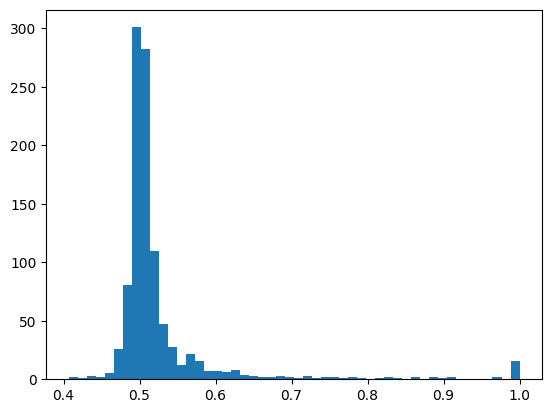

In [46]:
pl.hist(tmp,bins=50)

/var/folders/y5/y0w8x6853cz9j26g_c7135gr0000gn/T/ipykernel_55743/1897011667.py:8: RuntimeWarning: divide by zero encountered in log
  log_fr = (N-1) * np.log(r) + ((N-2)/2) * np.log(1 - r**2)


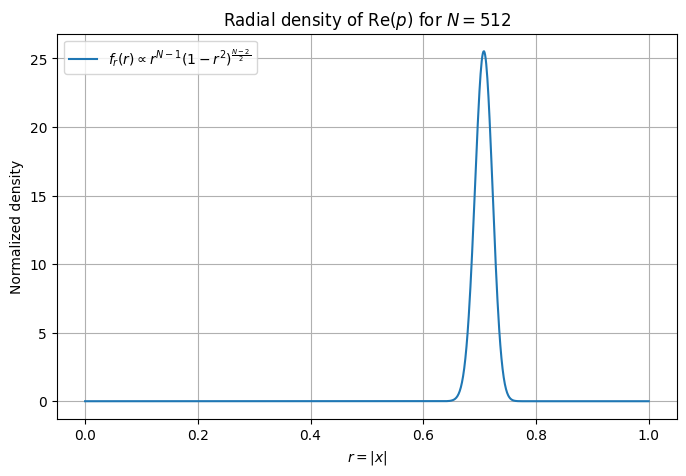

In [38]:
# 次元
N = 512

# rの範囲を0から1まで等間隔に
r = np.linspace(1e-8, 1, 1000)  # 0除算を避けるため下限を少し正

# 対数密度を計算: log(f_r(r)) = (N-1) log(r) + ((N-2)/2) log(1-r^2)
log_fr = (N-1) * np.log(r) + ((N-2)/2) * np.log(1 - r**2)

# 数値安定化のため、最大値でシフトしてから指数
log_fr_shifted = log_fr - np.max(log_fr)
fr = np.exp(log_fr_shifted)

# frを正規化（相対密度として表示）
fr_norm = fr / np.trapz(fr, r)

pl.figure(figsize=(8, 5))
pl.plot(r, fr_norm, label=r'$f_r(r) \propto r^{N-1}(1-r^2)^{\frac{N-2}{2}}$')
pl.xlabel(r'$r=\|x\|$')
pl.ylabel('Normalized density')
pl.title('Radial density of $\operatorname{Re}(p)$ for $N=512$')
pl.legend()
pl.grid(True)
pl.show()

0.5031725858439597


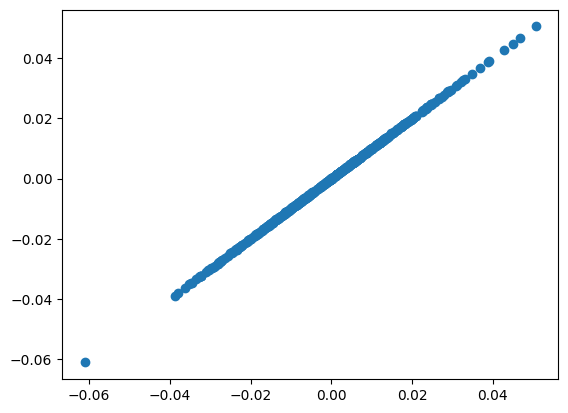

In [32]:
p=eigs[1][:,2:3]
A=(np.conjugate(p)@p.T).real


norm=np.sum((p.real)**2)
print(norm)
pl.scatter(A@p.real,norm*p.real)


In [48]:
### check the relative weight of cov to cov + J-J.T 
N=512
inet=0
type_J="random_asym"
tmp=np.load(ADR+"spn_asymJ_N512_inet%d.npz"%inet,allow_pickle=True)
dyn_noise_all,J,list_beta=tmp["dyn"],tmp["J"],tmp["list_beta"]
norm_cov=np.cov(dyn_noise_all[0,5000:].T)/f_d_ratio

J=sf.gen_J(N,type_J,inet)
eigs=np.linalg.eig(J)


tmpall=[]
for beta in list_beta:
    a=norm_cov @ eigs[1].real
    b=0.5*beta*(J-J.T)@eigs[1].real
    nume =np.sum(a**2,axis=0)
    denom=np.sum( (a+b)**2,axis=0)
    tmp=1-np.sqrt(nume/denom)
    tmpall.append(tmp)
tmpall=np.array(tmpall)

-9.710541469940361e-05
0.003609547810088266
0.010955039697026603
0.021639436981173123
0.035264714472181206
0.051376965326273234


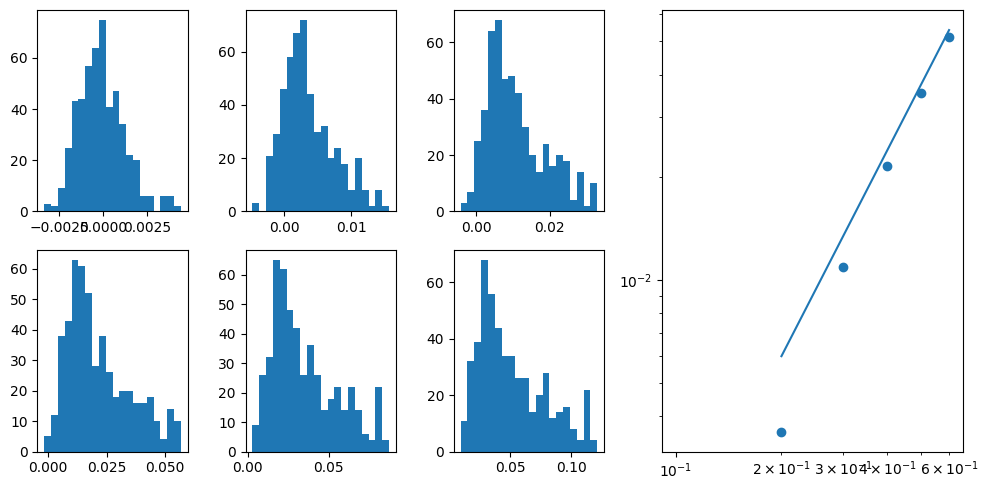

In [53]:
import matplotlib.gridspec as gridspec

fig = pl.figure(figsize=(10, 5))

# Define the grid layout (rows x cols)
gs = gridspec.GridSpec(2, 4, height_ratios=[1, 1], width_ratios=[1, 1, 1, 2])

for i in range(6):
    ax = fig.add_subplot(gs[i//3, i%3])
    ax.hist(tmpall[i],bins=20)
    print(np.mean(tmpall[i]))
    
ax = fig.add_subplot(gs[:, 3])
ax.set_xscale("log")
ax.set_yscale("log")
x=np.linspace(0.2,0.6,5)
ax.scatter(list_beta,np.mean( tmpall,axis=1))
pl.plot(x,0.15*x**2)


pl.tight_layout()
pl.savefig("measurement_eq44_for_reply.eps")

In [58]:
estall=[]
estall1=[]
for beta in list_beta:
    estall.append(1-np.sqrt(1- (beta*eigs[0].imag * (1- beta*eigs[0].real))**2)) 
    estall1.append(0.5*(beta*eigs[0].imag * (1- beta*eigs[0].real))**2)

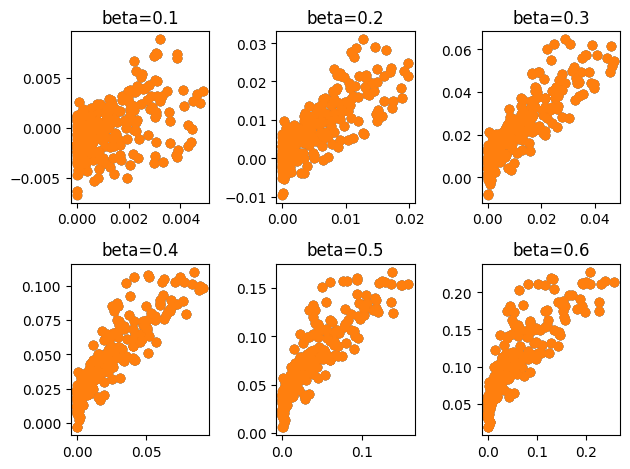

In [60]:
x=np.linspace(0.995,1,5)

for i in range(6):
    pl.subplot(2,3,i+1)
    pl.title("beta=%g"%list_beta[i])
    pl.scatter(estall[i],tmpall[i])
    pl.scatter(estall[i],tmpall[i])
pl.tight_layout()

In [9]:
## generation of random orthogonal matrix
rng = np.random.default_rng()

# 正規分布に従う GL(d) の乱数を n 個生成
def normalGL(n, d):
    # det(A)==0 の行列が生成されなくなるまで繰り返し
    while True:
        A = rng.normal(size=[n, d, d])
        crit = np.linalg.det(A)!=0
        if np.all(crit): break
    return A

# グラム・シュミット正規直交化
def GramSchmidt(A):
    k = np.shape(A)[-1]
    Gmm = np.array(A)
    for i in range(k):
        ip = np.sum(Gmm[..., i:i+1]*Gmm[..., :i], axis=-2, keepdims=True)
        sgm = Gmm[..., i]-np.sum(ip*Gmm[..., :i], axis=-1)
        Gmm[..., i] = sgm/np.linalg.norm(sgm, axis=-1, keepdims=True)
    return Gmm

# 一様にランダムな直交行列の生成
def uniformO(n, d):
    return GramSchmidt(normalGL(n, d))

# 10 次直交行列を 10**4 個生成
n = 1
P = uniformO(n, N)[0]

In [11]:
## check cov @ random taget
N=512
inet=0
type_J="random_sym"
tmp=np.load(ADR+"spn_rndJ_N512_inet%d.npz"%inet,allow_pickle=True)
dyn_noise_all,J,list_beta=tmp["dyn"],tmp["J"],tmp["list_beta"]
norm_cov=np.cov(dyn_noise_all[0,5000:].T)/f_d_ratio

J=sf.gen_J(N,type_J,inet)
eigs=np.linalg.eig(J)

(array([3.0000e+01, 8.6700e+02, 1.0257e+04, 4.9643e+04, 9.7822e+04,
        7.6191e+04, 2.3877e+04, 3.2370e+03, 2.0700e+02, 1.3000e+01]),
 array([-0.10084135, -0.07956107, -0.05828078, -0.0370005 , -0.01572022,
         0.00556007,  0.02684035,  0.04812063,  0.06940092,  0.0906812 ,
         0.11196149]),
 <BarContainer object of 10 artists>)

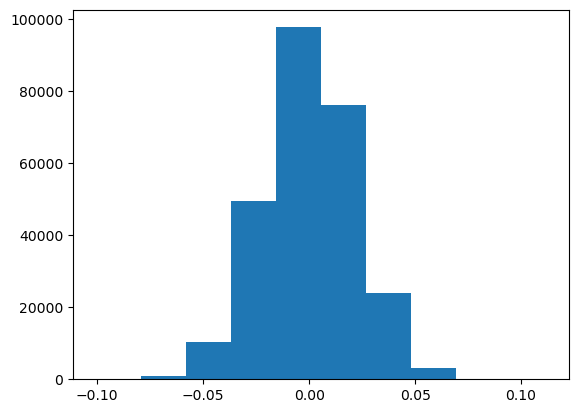

In [13]:
pl.hist(np.ravel(P.T@norm_cov@P - np.eye(N)))

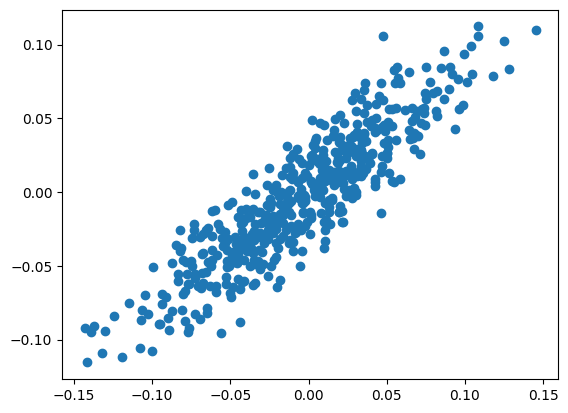

In [91]:
pl.scatter(norm_cov@rnd,rnd)

# spontaneous dynamics

In [3]:
Nnet=1
Ninit_spn=5

## data generation

In [6]:
imp.reload(dyf)
imp.reload(sf)

#type_J="preemb"
type_J="random_asym"

ipt_rnd=np.where(random.uniform(-1,1,(N,10))>0,1,-1)  # dummy 
trgt_rnd=np.where(random.uniform(-1,1,(N,10))>0,1,-1) # dummy
id_apl=0

T,Tbin=5000,10  # T=5000 for paper
gamma=0

    
for inet in range(Nnet):
    if type_J=="random_sym":
        J=sf.gen_J(N,type_J,inet)  
        list_beta=np.linspace(0.1,0.6,6)
    elif type_J=="random_asym":
        J=sf.gen_J(N,type_J,inet)
        list_beta=np.linspace(0.1,0.6,6)
       
    elif type_J=="preemb":
        alpha=0.6
        J,Jtrgt,Jipt=sf.gen_J(N,type_J,inet,alpha=alpha)
        list_beta=np.linspace(0.6,1.4,9)
    elif type_J=="hopf":
        alpha=0.05
        J,Jtrgt=sf.gen_J(N,type_J,inet,alpha=alpha)
        list_beta=[1,1.5,2,3,4,5,6,7,8]             
        
        is_flct_resp=True
        if is_flct_resp:
            tmp=np.load("16th_data/lrndyn_hopfJ_random_hopfipt2_a%g_N512_inet0.npz"%alpha)
            [ipt,trgt]=tmp["ipt_trgt"]
            if list_beta!=list(tmp["list_beta"]):
                print("list_beta in the data file does not match with that for simulation")
            else:
                ipt_rnd=ipt
                trgt_rnd=trgt
                Ninit_spn=25
                gamma=0.5


    #"""
    dyn_noise_all=[]
    dyn_label=[]
    for beta in list_beta:
        for iinit in range(Ninit_spn):
            print(iinit)
            x0=random.uniform(-1,1,(N,1))
            if type_J=="hopf":
                x0=Jtrgt[:,:1]
                
                
            dyn=dyf.calc_dyn(J,x0,gamma,[ipt_rnd[:,iinit:iinit+1],trgt_rnd[:,iinit:iinit+1]],T,Tbin,True,beta,is_noisy_dyn=True)
            dyn=np.vstack((x0.T,dyn[1][:,:,0]))
            dyn_noise_all.append(dyn)
            dyn_label.append(beta)
    #"""
    if type_J=="random_sym":
        np.savez(ADR+"spn_rndJ_N%d_inet%d"%(N,inet),J=J,dyn=dyn_noise_all,list_beta=list_beta,Ninit=Ninit_spn,dyn_label=dyn_label)
    elif type_J=="random_asym":
        np.savez(ADR+"spn_asymJ_N%d_inet%d"%(N,inet),J=J,dyn=dyn_noise_all,list_beta=list_beta,Ninit=Ninit_spn,dyn_label=dyn_label)        
    elif type_J=="preemb":
        np.savez(ADR+"spn_embJ_a%g_N%d_inet%d"%(alpha,N,inet),\
                 J=J,Jipt=Jipt,Jtrgt=Jtrgt,dyn=dyn_noise_all,list_beta=list_beta,Ninit=Ninit_spn,dyn_label=dyn_label)
                # in an old ver, Jipt,Jtrgt might not be recorded in a file
    elif type_J=="hopf":
        
        if is_flct_resp:
            """ for spn flct around x_r         """
            np.savez(ADR+"spn_resp_hopfJ_a%g_N%d_inet%d"%(alpha,N,inet),\
                     J=J,Jtrgt=Jtrgt,dyn=dyn_noise_all,list_beta=list_beta,Ninit=Ninit_spn,dyn_label=dyn_label)
            print(dyn_noise_all.shape)
            Ninit_spn=5
            gamma=0.0    
        else:
            np.savez(ADR+"spn_hopfJ_a%g_N%d_inet%d"%(alpha,N,inet),\
                     J=J,Jtrgt=Jtrgt,dyn=dyn_noise_all,list_beta=list_beta,Ninit=Ninit_spn,dyn_label=dyn_label)
            
        


0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


## analysis

In [ ]:
for ib,beta in enumerate(list_beta):
    if ib in [3,5,8]:
        for i in range(5):
            tmp=np.var(dyn_noise_all[5*ib+i][1000:],axis=0)
            pl.scatter(beta,np.mean(tmp))

In [ ]:
Ninp=10
type_J="hopf"
type_trgt_ipt="random_hopf"
inet=0

std_all=[]

for alpha in [0.02,0.05,0.07]:
    tmp=np.load(ADR+"spn_hopfJ_a%g_N512_inet%d.npz"%(alpha,inet),allow_pickle=True)
    dyn_noise_all,J,list_beta=tmp["dyn"],tmp["J"],tmp["list_beta"]
    Jtrgt=tmp["Jtrgt"]
    trgt,ipt=sf.gen_trgt_ipt(N,Ninp,type_trgt_ipt,Jtrgt=Jtrgt)


    std_all.append([])
    
    for ib,beta in enumerate(list_beta):
        tmp=[]
        for i in range(5):
            tmp.append(np.std(dyn_noise_all[5*ib+i][1000:]@Jtrgt[:,:10],axis=0))

        tmp1=[]
        for i in range(5):
            tmp1.append(np.std(dyn_noise_all[5*ib+i][1000:]@ipt[:,:10],axis=0))

        std_all[-1].append([np.mean(tmp,axis=0),np.mean(tmp1,axis=0)])
std_all=np.array(std_all)

In [ ]:
plot_beta=list_beta[2:]
list_alpha=[0.02,0.05,0.07]
fig=pl.figure()
ax=fig.add_subplot(1,2,1)
vmax,vmin=np.max(plot_beta),np.min(plot_beta)

for ib,beta in enumerate(plot_beta):
    ax.scatter(beta*np.ones(10),std_all[1,ib+2,0],vmax=vmax,vmin=vmin,cmap="rainbow",c=beta*np.ones(10))
    ax.scatter(beta*np.ones(10),std_all[1,ib+2,1],vmax=vmax,vmin=vmin,cmap="rainbow",c=beta*np.ones(10),marker="x")
    
pl.yscale("log")


ax=fig.add_subplot(1,2,2)
beta=list_beta[3]
for ia,alpha in enumerate(list_alpha):
    ax.scatter(alpha*np.ones(10),std_all[ia,3,0],vmax=vmax,vmin=vmin,cmap="rainbow",c=beta*np.ones(10))
    ax.scatter(alpha*np.ones(10),std_all[ia,3,1],vmax=vmax,vmin=vmin,cmap="rainbow",c=beta*np.ones(10),marker="x")
    
pl.savefig("std_spn_hopf.pdf")

In [ ]:
#alpha=0.05
pl.subplot(1,2,1)
for ib,beta in enumerate(list_beta):
    if ib in [3,5,8]:
        for i in range(5):
            tmp=np.var(dyn_noise_all[5*ib+i][1000:],axis=0)
            pl.scatter(beta,np.mean(tmp))

pl.subplot(1,2,2)
for i in range(8):
    if i in [3,5,8]:
        tmpdyn=(dyn_noise_all[5*i]@Jtrgt[:,0])[0:3000]
        pl.plot(tmpdyn[2500:]-tmpdyn[2500])

In [ ]:
#alpha=0.02
pl.subplot(1,2,1)
for ib,beta in enumerate(list_beta):
    for i in range(5):
        tmp=np.mean(dyn_noise_all[5*ib+i][700:]**2,axis=1)
        pl.scatter(beta,np.std(tmp))

pl.subplot(1,2,2)
for i in range(8):
    tmpdyn=(dyn_noise_all[5*i]@Jtrgt[:,0])[0:900]
    pl.plot(tmpdyn)

### analysis for random symmetric and asymmetric matrices

In [5]:
type_J="random_asym"
inet=0
if type_J=="random_sym":
    tmp=np.load(ADR+"spn_rndJ_N512_inet%d.npz"%inet,allow_pickle=True)
elif type_J=="random_asym":
    tmp=np.load(ADR+"spn_asymJ_N512_inet%d.npz"%inet,allow_pickle=True)
dyn_noise_all,J,list_beta=tmp["dyn"],tmp["J"],tmp["list_beta"]

eigs=np.linalg.eig(J)
    
var_spn_all=sf.calc_spn_all(inet,list_beta,type_J)
var_spn_eig_all=[]  # saved in avevar_spn_eig_all_inet0.npy   after averaging
for i in range(len(dyn_noise_all)):
    var_spn_eig_all.append(np.var(dyn_noise_all[i][-9000:,:]@eigs[1][:,:],axis=0))


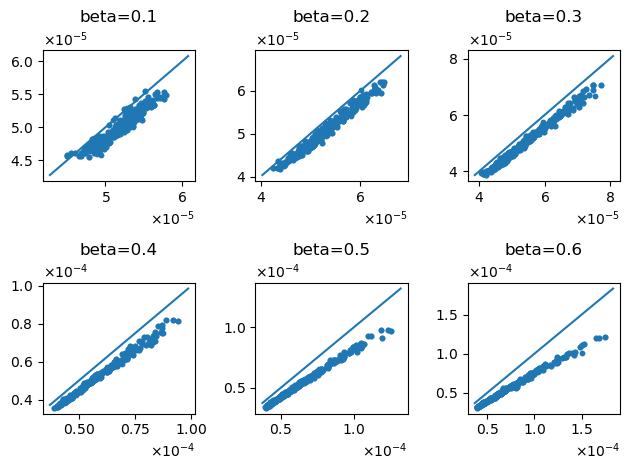

In [18]:
fig=pl.figure()

for ib,beta in enumerate(list_beta):
    ax=fig.add_subplot(2,3,ib+1)
    x=var_spn_eig_all[ib*Ninit_spn]
    ax.set_title("beta=%g"%beta)
    ax.scatter(x,f_d_ratio/(1-beta*eigs[0].real),s=10)
    x1=np.linspace(np.min(x)*0.95,np.max(x)*1.05)
    ax.plot(x1,x1)
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
fig.tight_layout()

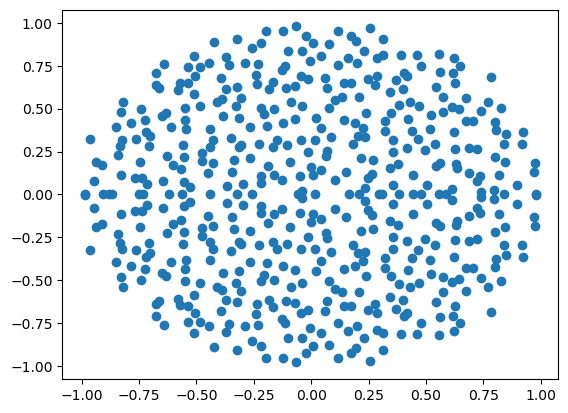

In [22]:
pl.scatter(eigs[0].real,eigs[0].imag)

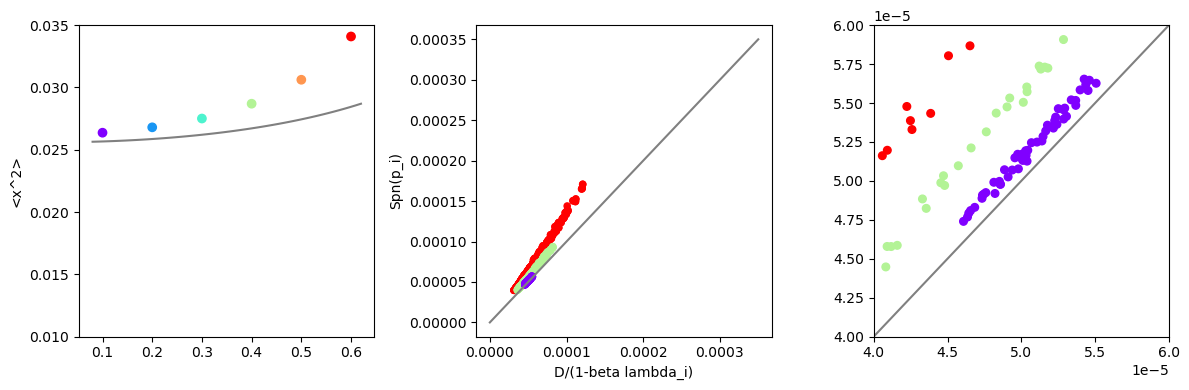

In [20]:
avevar_spn_eig_all=np.array([np.mean(var_spn_eig_all[ib*Ninit_spn:(ib+1)*Ninit_spn], axis=0) for ib in range(len(list_beta))])
#avevar_spn_eig_all=np.load(ADR+"avevar_spn_eig_all_inet0.npy")
vmin,vmax=np.min(list_beta),np.max(list_beta)

pl.figure(figsize=(12,4))
pl.subplot(1,3,1)
pl.scatter(list_beta,var_spn_all,vmin=vmin,vmax=vmax,c=list_beta,cmap="rainbow")  

anl_sd=[]
list_beta1=np.linspace(0.08,0.62,50)
for beta in list_beta1:
    anl_sd.append( np.sum(f_d_ratio/(1-beta*eigs[0].real )) )
pl.plot(list_beta1,np.array(anl_sd),c="gray")

pl.ylabel("<x^2>")
pl.ylim(0.01,0.035)

## comparison between spn in the direction of eigen vector i and 1/(1-beta lambda_i)
pl.subplot(1,3,2)
for beta in [0.6,0.4,0.1]:
    ib = np.where(list_beta==beta)[0][0]
    
    pl.scatter(f_d_ratio/(1-beta*eigs[0].real ),avevar_spn_eig_all[ib],\
               s=20,vmin=vmin,vmax=vmax,c=beta*np.ones(len(eigs[0])),cmap="rainbow")
x=np.linspace(0,0.00035,10)
pl.plot(x,x,c="gray")
pl.xlabel("D/(1-beta lambda_i)")
pl.ylabel("Spn(p_i)")


pl.subplot(1,3,3)

for beta in [0.6,0.4,0.1]:
    ib = np.where(list_beta==beta)[0][0]
    
    pl.scatter(f_d_ratio/(1-beta*(eigs[0].real)[::10]),avevar_spn_eig_all[ib][::10],\
               s=30,vmin=vmin,vmax=vmax,c=beta*np.ones(len(eigs[0][::10])),cmap="rainbow")
x=np.linspace(0.00004,0.00006)
pl.plot(x,x,c="gray")
pl.xlim(4e-5, 6e-5)
pl.ylim(4e-5, 6e-5)
pl.tight_layout() 
#pl.savefig("spn.pdf")
#pl.savefig("spn_tmp.pdf")

# learning 

## data generation

In [11]:
imp.reload(dyf)
imp.reload(sf)

Ttrns=100

is_full_lrn=False
is_flct_resp=False
type_J="random_sym"
#type_J="random_asym"
#type_J="preemb"
#type_J="hopf"
if type_J=="hopf":
    is_Hebb=True    
    Ttrns=500
else:
    is_Hebb=False
    


if is_full_lrn:
    
    Ninp=20
    if type_J=="random_sym" or type_J=="random_asym":
        list_beta=[0.1,0.2,0.3,0.4,0.5,0.6]
        #type_trgt_ipt="entire_lrn_eig"
        type_trgt_ipt="entire_lrn_random"
    elif type_J=="preemb":
        type_trgt_ipt="entire_lrn_random_preemb"
        #type_trgt_ipt="entire_lrn_trgt_preemb"
        list_beta=[0.6,0.9,1.2,1.4]
        alpha=0.1
    elif type_J=="hopf":
        #type_trgt_ipt="entire_lrn_trgt_hopf"
        type_trgt_ipt="entire_lrn_random_hopf"
        alpha=0.1
        
    T,Tbin=50000,50
    gamma=0.1 #0.5
    dt=0.1 #1.0
    eps=0.03

else:    
    T,Tbin=100,10
    if type_J=="hopf":
        Ninp=25
        gamma=0.5  
        T,Tbin=100,10
    elif type_J=="random_sym" or type_J=="random_asym":
        Ninp=10
        #gamma=0.001 
        #gamma=0.1  # for high_gamma.npy
        gamma=1.0  # for muchhigh_gamma.npy
    elif type_J=="preemb":
        Ninp=50
        gamma=0.001
        
    dt=0.05
    eps=0.01
    
    
    if type_J=="random_sym" or type_J=="random_asym":
        list_beta=[0.1,0.2,0.3,0.4,0.5,0.6]
        #type_trgt_ipt="eig"   # for random net
        type_trgt_ipt="random"  # for random  nets

    elif type_J=="preemb":
        alpha=0.1
        list_beta=np.linspace(0.6,1.4,9)
        #type_trgt_ipt="trgt_preemb"  # for preemb net
        type_trgt_ipt="random_preemb"  # for preemb net
        
    elif type_J=="hopf":
        alpha=0.05
        Ttrns=100
        #list_beta=[1,1.5,2,3,4,5,6,7,8]
        list_beta=[2,4,6]
        type_trgt_ipt="random_hopf"  # for preemb net
            
    else:
        print("in learning, invalid type_J="+type_J)

        
for inet in range(1):
    if type_J=="random_sym" or type_J=="random_asym":
        J=sf.gen_J(N,type_J,inet)    
        trgt,ipt=sf.gen_trgt_ipt(N,Ninp,type_trgt_ipt,J=J)
    elif type_J=="preemb":
        J,Jtrgt,Jipt=sf.gen_J(N,type_J,inet,alpha=alpha)  
        trgt,ipt=sf.gen_trgt_ipt(N,Ninp,type_trgt_ipt,Jipt=Jipt,Jtrgt=Jtrgt)
    elif type_J=="hopf":
        J,Jtrgt=sf.gen_J(N,type_J,inet,alpha=alpha) 
        trgt,ipt=sf.gen_trgt_ipt(N,Ninp,type_trgt_ipt,Jtrgt=Jtrgt)
    else:
        print("invalid type_J="+type_J)


    list_id=np.arange(len(ipt[0]))
    J_bf=np.copy(J)

    dyn_all=[]
    dyn_label=[]
    for beta in list_beta[:]:
        print(beta)
        for id_apl in list_id:
            xinit=np.zeros((N,1))
            J=np.copy(J_bf)
            
            if type_J=="hopf":
                xinit=Jtrgt[:,:1]
                x,dyn0=dyf.calc_dyn(J,xinit,0,[ipt[:,id_apl:id_apl+1],trgt[:,id_apl:id_apl+1]],Ttrns,Tbin,True,beta)
                xinit=x  # initial state for the learning is the state after convergence without learning. 
            
            if is_full_lrn:
                print(id_apl)
                x,dyn0=dyf.calc_dyn(J,xinit,gamma,[ipt[:,id_apl:id_apl+1],trgt[:,id_apl:id_apl+1]],Ttrns,Tbin,True,beta,is_chkfp=False)
                
                tmpleng=int(Ttrns/(dt*Tbin))+2
                if len(dyn0)<tmpleng:
                    dyntmp=np.tile(dyn0[-2:-1,:,:],(tmpleng-len(dyn0),1,1))
                    dyn0=np.concatenate([dyn0,dyntmp],0)

                xinit=x 
                x,dyn,J=dyf.calc_dyn1(J,xinit,gamma,[ipt[:,id_apl:id_apl+1],trgt[:,id_apl:id_apl+1]],T,Tbin,False,beta,is_Hebb=is_Hebb)
                dyn=np.concatenate([dyn0,dyn],0)
            else:
                x,dyn0=dyf.calc_dyn(J,xinit,gamma,[ipt[:,id_apl:id_apl+1],trgt[:,id_apl:id_apl+1]],Ttrns,Tbin,True,beta,is_noisy_dyn=False,is_chkfp=False)
                
                tmpleng=int(Ttrns/(dt*Tbin))+2
                if len(dyn0)<tmpleng:
                    dyntmp=np.tile(dyn0[-2:-1,:,:],(tmpleng-len(dyn0),1,1))
                    dyn0=np.concatenate([dyn0,dyntmp],0)
                    
                xinit=x 
                x,dyn,J=dyf.calc_dyn(J,xinit,gamma,[ipt[:,id_apl:id_apl+1],trgt[:,id_apl:id_apl+1]],T,Tbin,False,beta,is_noisy_dyn=False,is_Hebb=is_Hebb)
                dyn=np.concatenate([dyn0,dyn],0)
            dyn_all.append(dyn[:,:,0])
            dyn_label.append([beta,id_apl])


    J=np.copy(J_bf)
    dyn_lrn={"dyn"+str(i): dyn for i, dyn in enumerate(dyn_all)}

    tmp_kwargs=dict(list_beta=list_beta, gamma=gamma,ipt_trgt=[ipt,trgt],list_id=list_id,dt=dt,eps=eps)
    
    if is_full_lrn:
        if type_J=="random_sym":
            np.savez(ADR+"fulllrndyn_rndJ_"+type_trgt_ipt+"ipt_N%d_inet%d"%(N,inet),\
                     **dyn_lrn,J=J,dyn_label=dyn_label,Tbin=Tbin,**tmp_kwargs)
        elif type_J=="random_asym":
            np.savez(ADR+"fulllrndyn_asymJ_"+type_trgt_ipt+"ipt_N%d_inet%d"%(N,inet),\
                     **dyn_lrn,J=J,dyn_label=dyn_label,Tbin=Tbin,**tmp_kwargs)
        elif type_J =="preemb":
            fname=ADR+"fulllrndyn_embJ_"+type_trgt_ipt+"ipt2_a%g_N%d_inet%d"%(alpha,N,inet)
            np.savez(fname,\
                     **dyn_lrn,J=J,Jipt=Jipt,Jtrgt=Jtrgt,dyn_label=dyn_label,Tbin=Tbin,**tmp_kwargs)
        elif type_J == "hopf":
            fname=ADR+"fulllrndyn_hopfJ_"+type_trgt_ipt+"ipt2_a%g_N%d_inet%d"%(alpha,N,inet)
            np.savez(fname,\
                     **dyn_lrn,J=J,Jtrgt=Jtrgt,dyn_label=dyn_label,Tbin=Tbin,**tmp_kwargs)

    elif type_J=="random_sym":
        fname=ADR+"lrndyn_rndJ_"+type_trgt_ipt+"ipt_N%d_inet%d_muchhighgamma"%(N,inet)
        np.savez(fname, **dyn_lrn,J=J,**tmp_kwargs)
    elif type_J=="random_asym":
        fname=ADR+"lrndyn_asymJ_"+type_trgt_ipt+"ipt_N%d_inet%d"%(N,inet)
        np.savez(fname, **dyn_lrn,J=J,**tmp_kwargs)
    elif type_J == "preemb":
        fname=ADR+"lrndyn_embJ_"+type_trgt_ipt+"ipt3_a%g_N%d_inet%d"%(alpha,N,inet)
        np.savez(fname, **dyn_lrn,J=J,Jipt=Jipt,Jtrgt=Jtrgt,**tmp_kwargs)
    elif type_J == "hopf":
        fname=ADR+"lrndyn_hopfJ_"+type_trgt_ipt+"ipt2_a%g_N%d_inet%d"%(alpha,N,inet)
        np.savez(fname, **dyn_lrn,J=J,Jtrgt=Jtrgt,**tmp_kwargs)
    else:
        print("invalid type_J="+type_J)


0.1
0.2
0.3
0.4
0.5
0.6


## analysis of full learning process

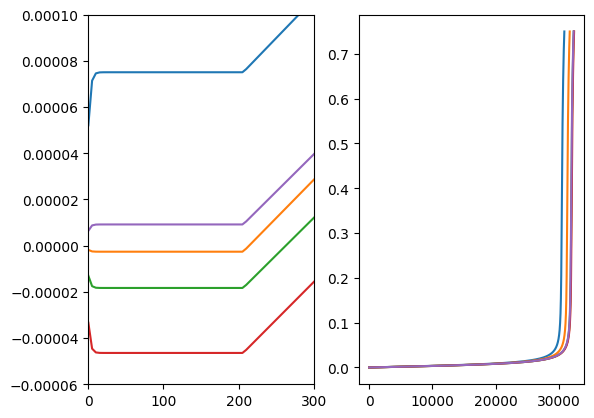

In [114]:
tmp=np.load(ADR+"fulllrndyn_rndJ_entire_lrn_eigipt_N512_inet0.npz")
list_beta=tmp["list_beta"]
[ipt,trgt]=tmp["ipt_trgt"]
dyn_lrn=[tmp["dyn"+str(i)] for i in range(5)]
list_id=tmp["list_id"]


T=[]
pl.figure()
pl.subplot(1,2,1)
for i in range(5):
    pl.plot(np.arange(len(dyn_lrn[i][2:]))*dt*Tbin,dyn_lrn[i][2:,:]@trgt[:,i]/N)
    
pl.xlim(0,300)
pl.ylim(-0.00006,0.0001)

pl.subplot(1,2,2)
for i in range(5):
    pl.plot(np.arange(len(dyn_lrn[i][2:]))*dt*Tbin,dyn_lrn[i][2:,:]@trgt[:,i]/N)
    
pl.savefig("example_lrndyn.pdf")

(-0.004, 0.01)

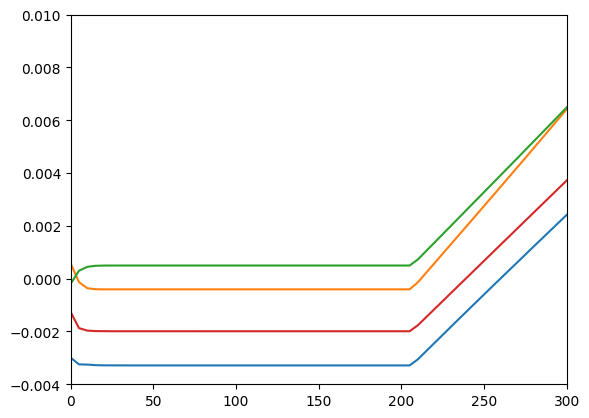

In [110]:
tmp=np.load(ADR+"fulllrndyn_embJ_entire_lrn_trgt_preembipt2_a0.1_N512_inet0.npz")
list_beta=tmp["list_beta"]
[ipt,trgt]=tmp["ipt_trgt"]
dyn_lrn=[tmp["dyn"+str(i)] for i in range(4)]
list_id=tmp["list_id"]


T=[]
pl.figure()
for i in range(4):
    pl.plot(np.arange(len(dyn_lrn[i][2:]))*dt*Tbin,dyn_lrn[i][2:,:]@trgt[:,i]/N)

pl.xlim(0,300)
pl.ylim(-0.004,0.01)

(-1e-05, 0.0002)

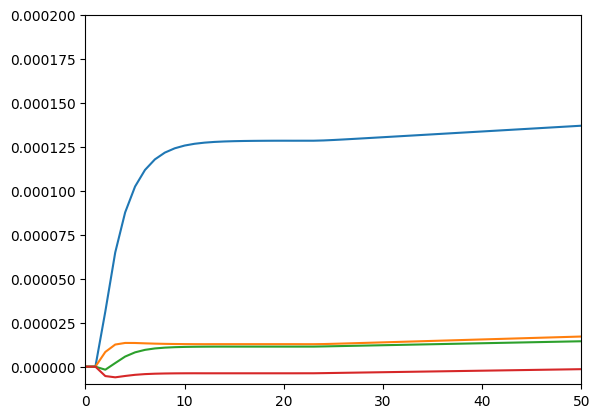

In [71]:
tmp=np.load(ADR+"fulllrndyn_tmp_rndJ_entire_lrn_eigipt_N512_inet0.npz")
list_beta=tmp["list_beta"]
[ipt,trgt]=tmp["ipt_trgt"]
dyn_lrn=[tmp["dyn"+str(i)] for i in range(4)]
list_id=tmp["list_id"]

T1=[]
pl.figure()
for i in range(4):
    pl.plot(dyn_lrn[i][:,:]@trgt[:,i]/N)
    T1.append(len(dyn_lrn[i])-20)
    
pl.xlim(0,50)
pl.ylim(-0.00001,0.0002)

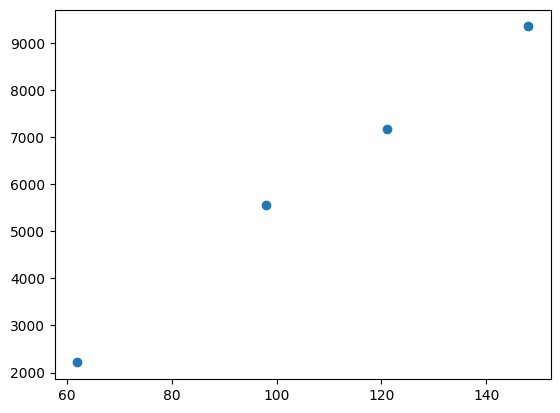

In [69]:
pl.figure()
pl.scatter(T,T1)

##   initial learning speed

### eig and random target in random sym with high gamma

In [19]:
imp.reload(sf)
type_trgt_ipt="eig"
type_J="random_sym"
inet=0

lrnspd_all,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet)

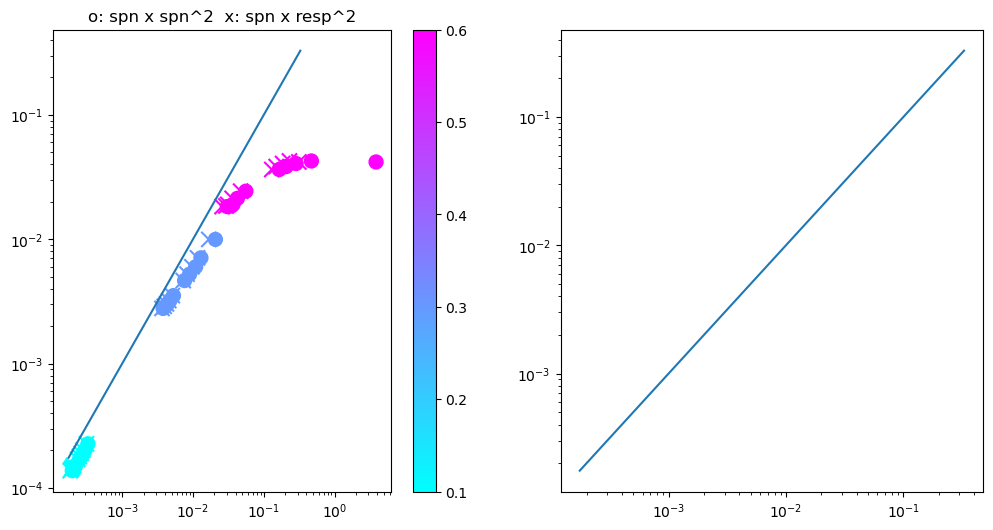

In [18]:
#gamma=1.0
imp.reload(sf)
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_eig_symJ_muchhighgamma.pdf",_type_J=type_J,plot_beta=[0.1,0.3,0.6])

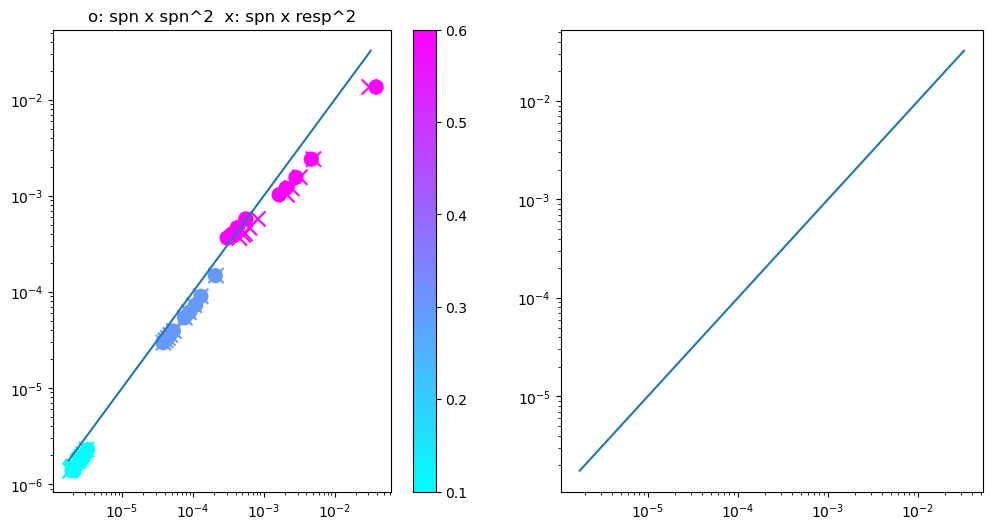

In [20]:
# gamma=0.1
imp.reload(sf)
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_eig_symJ_highgamma.pdf",_type_J=type_J,plot_beta=[0.1,0.3,0.6])

In [14]:
imp.reload(sf)
type_trgt_ipt="random"
type_J="random_sym"
inet=0

lrnspd_all,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet)

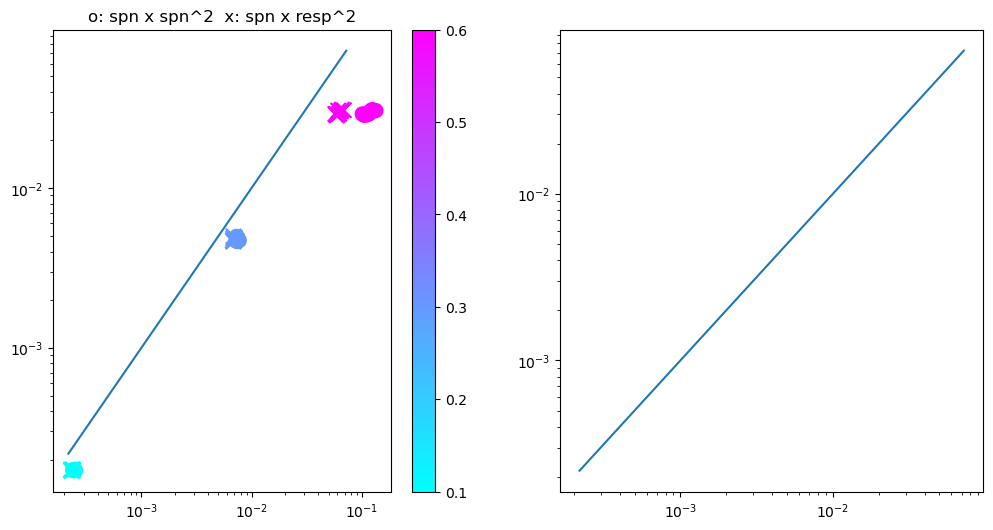

In [15]:
#gamma=1.0
imp.reload(sf)
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_eig_symJ_muchhighgamma.pdf",_type_J=type_J,plot_beta=[0.1,0.3,0.6])

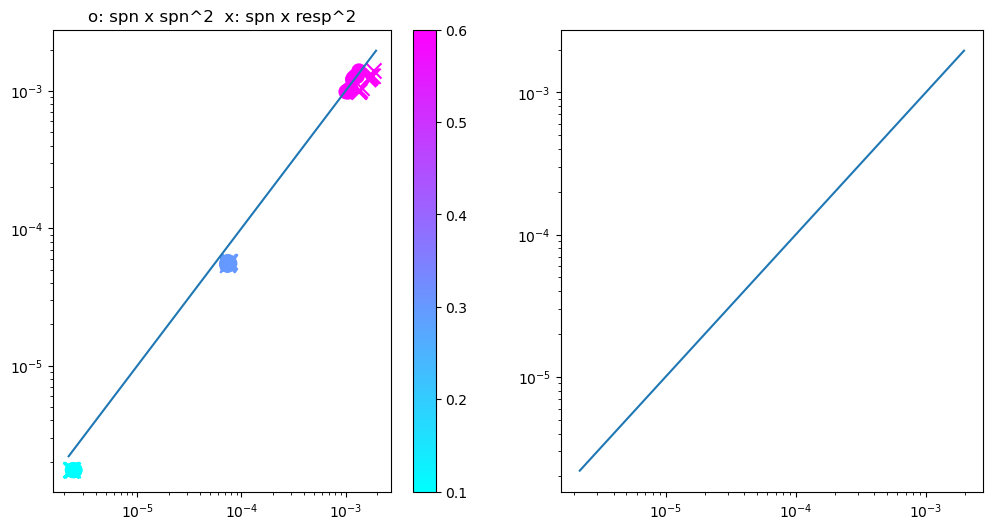

In [9]:
#gamma=0.1
imp.reload(sf)
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_eig_symJ_highgamma.pdf",_type_J=type_J,plot_beta=[0.1,0.3,0.6])

### eig target in random asym J

In [25]:
imp.reload(sf)
type_trgt_ipt="eig"
type_J="random_asym"
inet=0

lrnspd_all,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet)

/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:907: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im0)


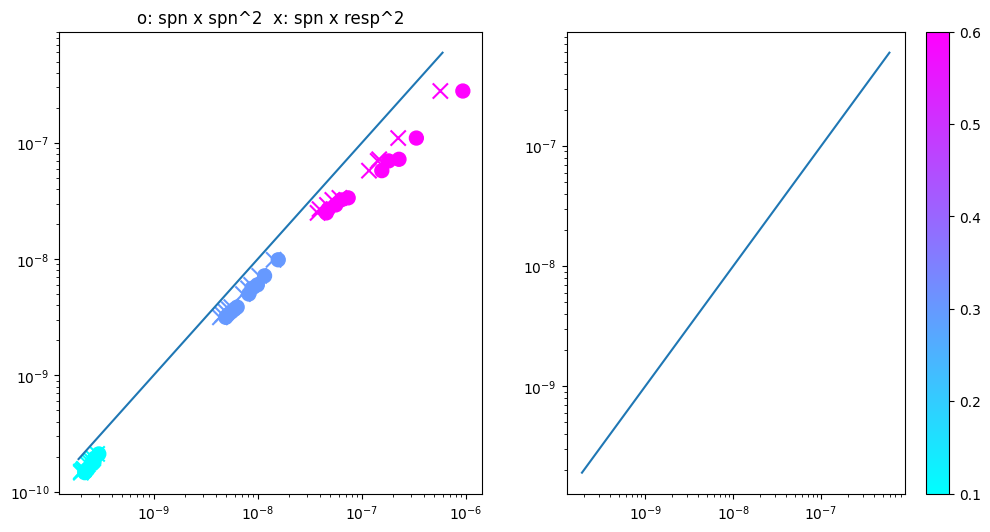

In [21]:
imp.reload(sf)
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_eig_asymJ.pdf",_type_J=type_J,plot_beta=[0.1,0.3,0.6])

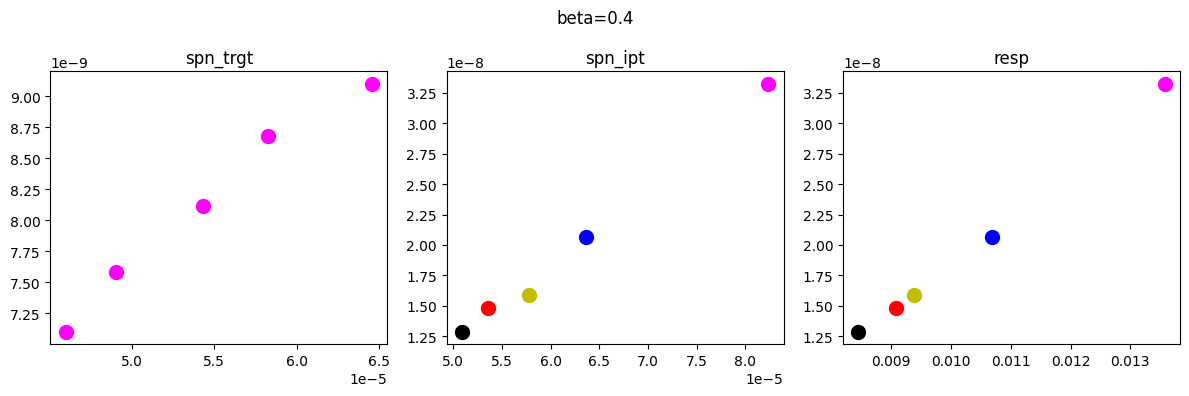

In [26]:
## Tresp in calculation of resp value makes a little change in the trend
ib=3

fig=pl.figure(figsize=(12,4))
fig.suptitle("beta=%g"%list_beta[ib])
axes=[]
for i in range(3):
    axes.append(fig.add_subplot(1,3,i+1))
axes[0].set_title("spn_trgt")
axes[1].set_title("spn_ipt")
axes[2].set_title("resp")

j=0
for k in range(5,10):
    y=lrnspd_all["lrnspd_emp"][ib][k]
    axes[0].scatter(spn_resp["spn_trgt"][ib][k],y,c=cset[j],marker="o",s=100)
    
k=0
for j in range(5):
    y=lrnspd_all["lrnspd_emp"][ib][j]
    axes[1].scatter(spn_resp["spn_ipt"][ib][j],y,c=cset[j],marker=tset[k],s=100)
    axes[2].scatter(np.linalg.norm(spn_resp["resp"][ib*10+j]),y,c=cset[j],marker=tset[k],s=100)

pl.tight_layout()
pl.savefig("lrnspd_eig_asymJ_b%g.pdf"%list_beta[ib])

###  random target in random asym

In [30]:
imp.reload(sf)
type_trgt_ipt="random"
type_J="random_asym"
inet=0
# NOTE:  ipt.dat not ipt2.dat,  Nresp=150
lrnspd_all,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet)

/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:906: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im0)


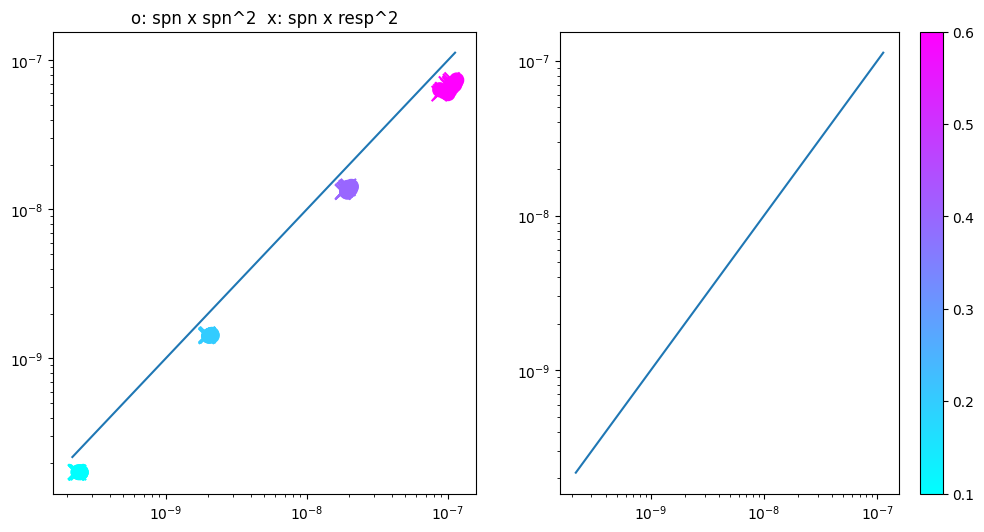

In [31]:
imp.reload(sf)
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_random_asymJ.pdf",_type_J=type_J,plot_beta=[0.1,0.2,0.4,0.6])

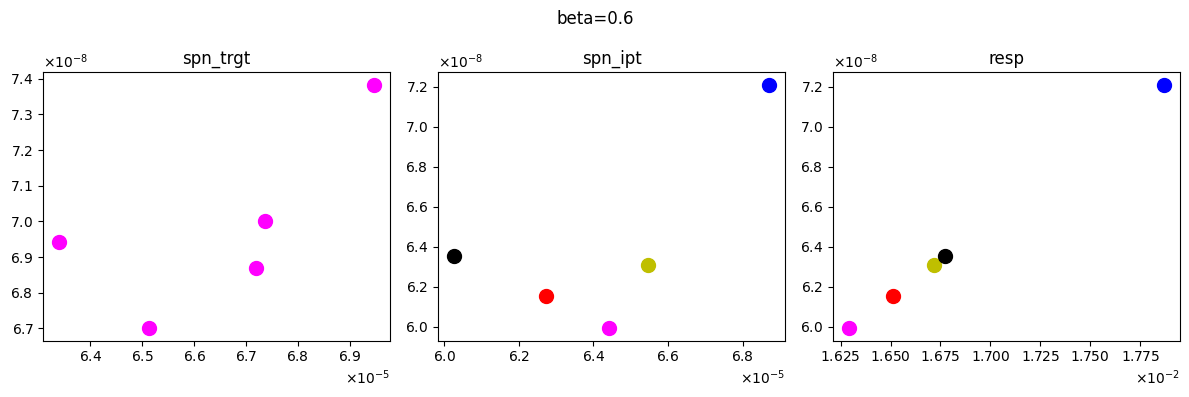

In [39]:
## Tresp in calculation of resp value makes a little change in the trend
ib=5

fig=pl.figure(figsize=(12,4))
fig.suptitle("beta=%g"%list_beta[ib])
axes=[]
for i in range(3):
    axes.append(fig.add_subplot(1,3,i+1))
axes[0].set_title("spn_trgt")
axes[1].set_title("spn_ipt")
axes[2].set_title("resp")

j=0
for k in range(5,10):
    y=lrnspd_all["lrnspd_emp"][ib][k]
    axes[0].scatter(spn_resp["spn_trgt"][ib][k],y,c=cset[j],marker="o",s=100)
    
k=0
for j in range(5):
    y=lrnspd_all["lrnspd_emp"][ib][j]
    axes[1].scatter(spn_resp["spn_ipt"][ib][j],y,c=cset[j],marker=tset[k],s=100)
    axes[2].scatter(np.linalg.norm(spn_resp["resp"][ib*10+j]),y,c=cset[j],marker=tset[k],s=100)

for i in range(3):
    #axes[i].set_xscale("log")
    #axes[i].set_yscale("log")
    axes[i].xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    axes[i].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    axes[i].ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
    axes[i].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
pl.tight_layout()
pl.savefig("lrnspd_rnd_asymJ_b%g.pdf"%list_beta[ib])

### map = eig vecs    type_trgt_ipt="eig"

In [23]:
imp.reload(sf)
type_trgt_ipt="eig"
type_J="random_sym"
inet=0

lrnspd_all,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet)

/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:906: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  axes[1].plot(x,x)


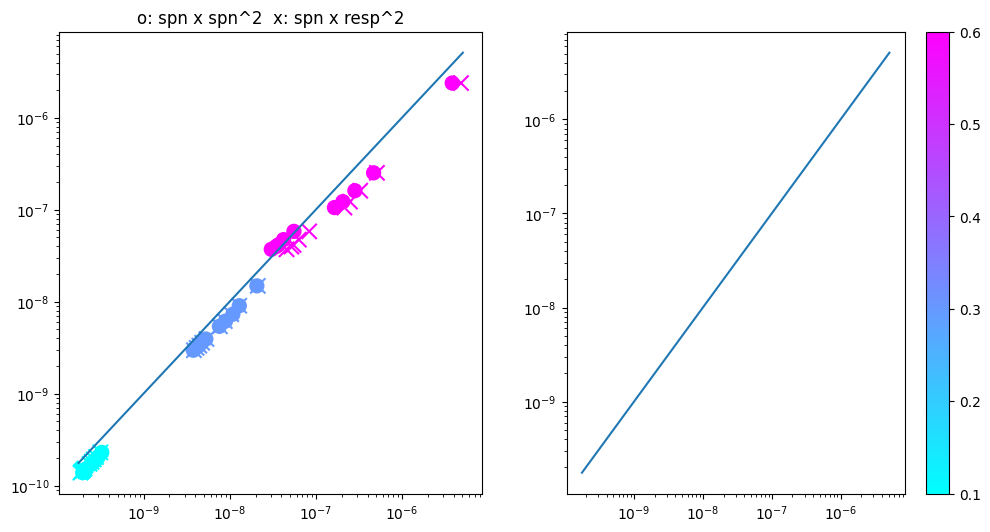

In [24]:
imp.reload(sf)
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_eig_rndJ.pdf",_type_J=type_J,plot_beta=[0.1,0.3,0.6])

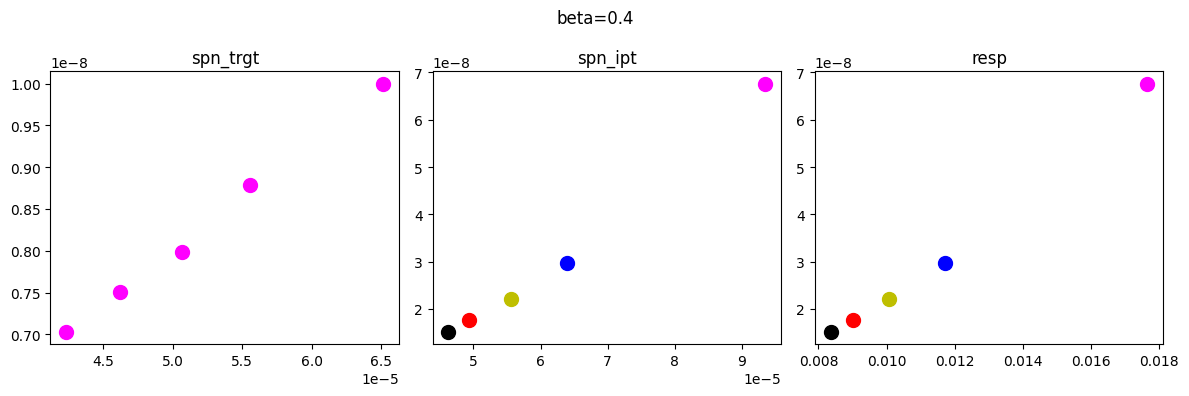

In [117]:
## Tresp in calculation of resp value makes a little change in the trend
ib=3

fig=pl.figure(figsize=(12,4))
fig.suptitle("beta=%g"%list_beta[ib])
axes=[]
for i in range(3):
    axes.append(fig.add_subplot(1,3,i+1))
axes[0].set_title("spn_trgt")
axes[1].set_title("spn_ipt")
axes[2].set_title("resp")

j=0
for k in range(5,10):
    y=lrnspd_all["lrnspd_emp"][ib][k]
    axes[0].scatter(spn_resp["spn_trgt"][ib][k],y,c=cset[j],marker="o",s=100)
    
k=0
for j in range(5):
    y=lrnspd_all["lrnspd_emp"][ib][j]
    axes[1].scatter(spn_resp["spn_ipt"][ib][j],y,c=cset[j],marker=tset[k],s=100)
    axes[2].scatter(np.linalg.norm(spn_resp["resp"][ib*10+j]),y,c=cset[j],marker=tset[k],s=100)

pl.tight_layout()
pl.savefig("lrnspd_eig_rndJ_b%g.pdf"%list_beta[ib])

###  random pat in random J

In [81]:
imp.reload(sf)
type_trgt_ipt="random"
type_J="random_sym"
inet=0
# NOTE:  ipt.dat not ipt2.dat,  Nresp=150
lrnspd_all,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet)

In [96]:
lrnspd_all,spn_resp=copy.deepcopy(lrnspd_all_r),copy.deepcopy(spn_resp_r)

/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:867: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im0)


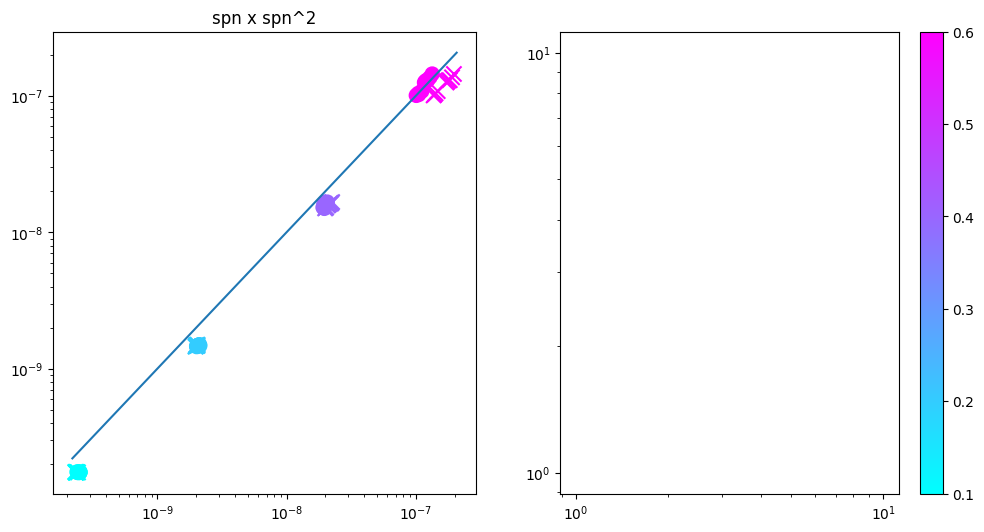

In [97]:
imp.reload(sf)
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_random_rndJ.pdf",_type_J=type_J,plot_beta=[0.1,0.2,0.4,0.6])

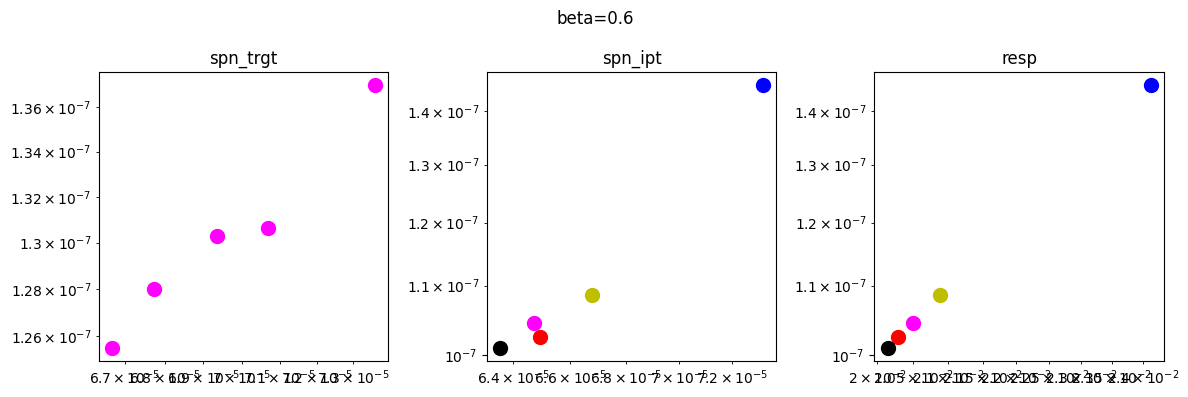

In [87]:
## Tresp in calculation of resp value makes a little change in the trend
ib=5

fig=pl.figure(figsize=(12,4))
fig.suptitle("beta=%g"%list_beta[ib])
axes=[]
for i in range(3):
    axes.append(fig.add_subplot(1,3,i+1))
axes[0].set_title("spn_trgt")
axes[1].set_title("spn_ipt")
axes[2].set_title("resp")

j=0
for k in range(5,10):
    y=lrnspd_all["lrnspd_emp"][ib][k]
    axes[0].scatter(spn_resp["spn_trgt"][ib][k],y,c=cset[j],marker="o",s=100)
    
k=0
for j in range(5):
    y=lrnspd_all["lrnspd_emp"][ib][j]
    axes[1].scatter(spn_resp["spn_ipt"][ib][j],y,c=cset[j],marker=tset[k],s=100)
    axes[2].scatter(np.linalg.norm(spn_resp["resp"][ib*10+j]),y,c=cset[j],marker=tset[k],s=100)

for i in range(3):
    axes[i].set_xscale("log")
    axes[i].set_yscale("log")
pl.tight_layout()
pl.savefig("lrnspd_rnd_rndJ_b%g.pdf"%list_beta[ib])

###  eig vs random

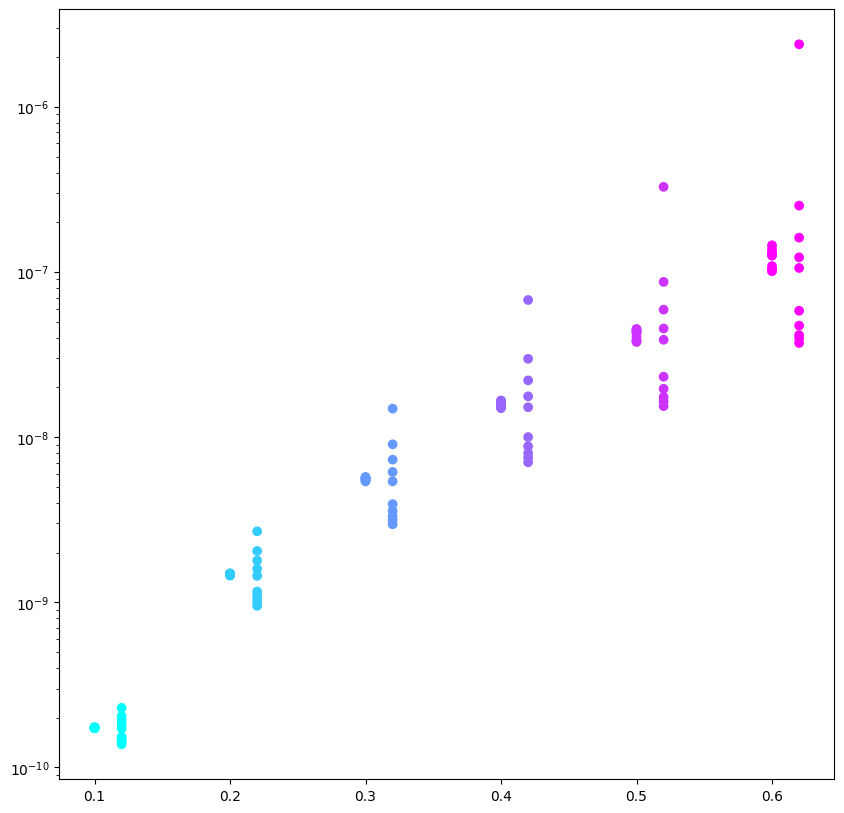

In [91]:
imp.reload(sf)
type_J="random_sym"
inet=0

#lrnspd_all_r,list_beta,spn_resp_r=copy.deepcopy(lrnspd_all),copy.deepcopy(list_beta),copy.deepcopy(spn_resp)
"""
type_trgt_ipt="random"
lrnspd_all_r,list_beta,spn_resp_r=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet)
type_trgt_ipt="eig"
lrnspd_all_e,list_beta,spn_resp_e=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet)
"""

vmin,vmax=np.min(list_beta),np.max(list_beta)

pl.figure(figsize=(10,10))
for ib,beta in enumerate(list_beta):
    yr,ye=lrnspd_all_r["lrnspd_emp"][ib],lrnspd_all_e["lrnspd_emp"][ib]
    xr,xe=beta*np.ones(len(yr)),beta*np.ones(len(ye))+0.02

    pl.scatter(xr,yr,cmap="cool",c=xr,vmax=vmax,vmin=vmin)
    pl.scatter(xe,ye,cmap="cool",c=xr,vmax=vmax,vmin=vmin)
    
pl.yscale("log")
pl.savefig("comp_lrnspd_rndJ.pdf")

### random pat in emb J

In [70]:
tmp=np.load("16th_data/lrndyn_embJ_random_preembipt3_a0.1_N512_inet0.npz")

Jtrgt=tmp["Jtrgt"]
[ipt,trgt]=tmp["ipt_trgt"]
list_beta=tmp["list_beta"]
list_id=tmp["list_id"]
Nmap=len(list_id)
dyn_lrn=np.array([tmp["dyn"+str(i)] for i in range(Nmap*len(list_beta))])

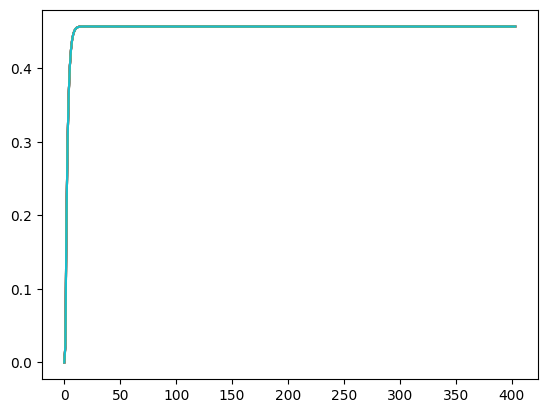

In [72]:
pl.figure()
for i in range(10):
    pl.plot(dyn_lrn[50*3+25+i]@ipt[:,25+i])

In [139]:
imp.reload(sf)
type_trgt_ipt="random_preemb"
type_J="preemb"
inet=0
alpha=0.1
#lrnspd_all=copy.deepcopy(lrnspd_all_r)
lrnspd_all,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)

/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:878: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im0)


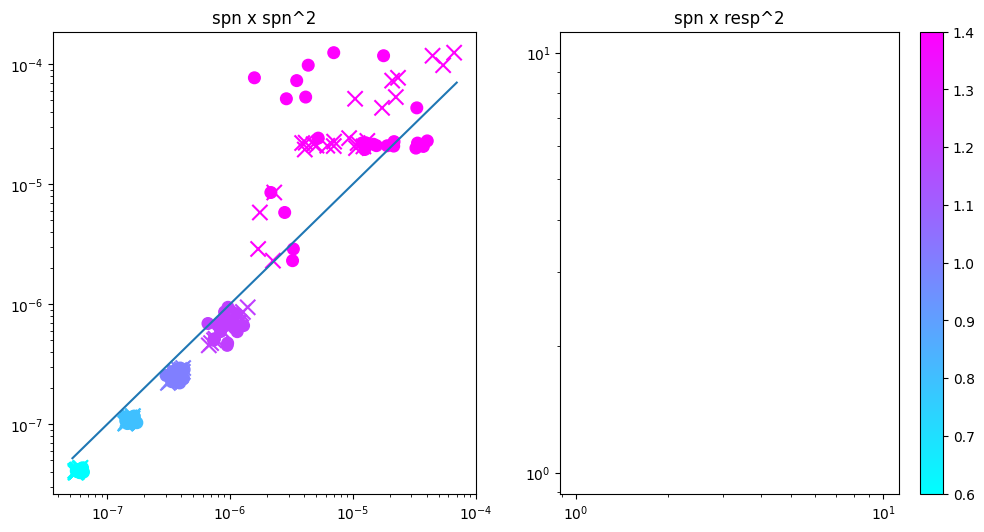

In [111]:
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_rnd3_embJ.pdf",plot_beta=[0.6,0.8,1.,1.2,1.4])

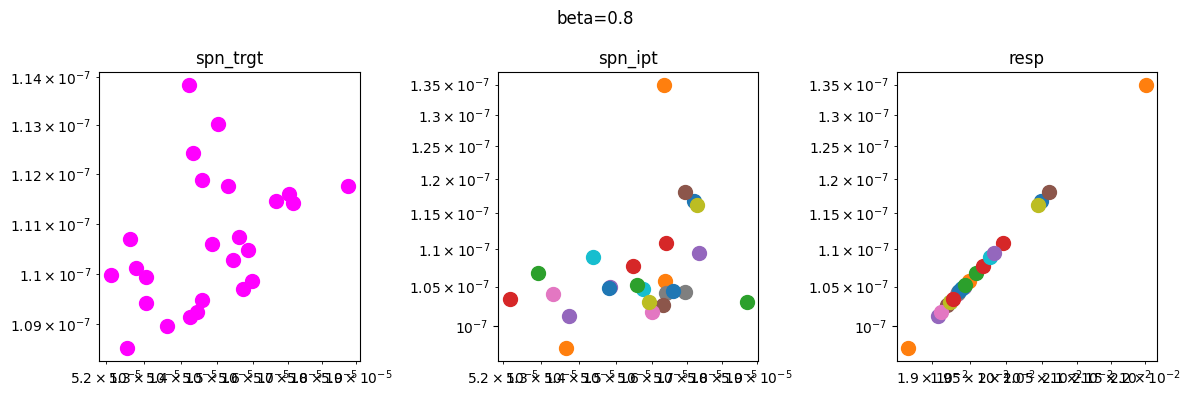

In [140]:
## Tresp in calculation of resp value makes a little change in the trend
ib=2

fig=pl.figure(figsize=(12,4))
fig.suptitle("beta=%g"%list_beta[ib])
axes=[]
for i in range(3):
    axes.append(fig.add_subplot(1,3,i+1))
axes[0].set_title("spn_trgt")
axes[1].set_title("spn_ipt")
axes[2].set_title("resp")

j=0
for k in range(25,50):
    y=lrnspd_all["lrnspd_emp"][ib][k]
    axes[0].scatter(spn_resp["spn_trgt"][ib][k],y,c=cset[j],marker="o",s=100)
    
k=0
for j in range(25):
    y=lrnspd_all["lrnspd_emp"][ib][j]
    axes[1].scatter(spn_resp["spn_ipt"][ib][j],y,marker=tset[k],s=100)
    axes[2].scatter(np.linalg.norm(spn_resp["resp"][ib*50+j]),y,marker=tset[k],s=100)

for i in range(3):
    axes[i].set_xscale("log")
    axes[i].set_yscale("log")
pl.tight_layout()
pl.savefig("lrnspd_rnd_embJ_b%g.pdf"%list_beta[ib])

In [ ]:
ib=5

%matplotlib qt
fig=pl.figure(figsize=(12,4))
fig.suptitle("beta=%g"%list_beta[ib])

axes=[]
for i in range(3):
    axes.append(fig.add_subplot(1,3,i+1))
axes[0].set_title("spn_trgt")
axes[1].set_title("spn_ipt")
axes[2].set_title("resp")

Nmap=len(spn_resp["spn_trgt"][0])
vmin,vmax=np.min(list_beta),np.max(list_beta)
"""
for j in range(5):
    for k in range(5):
        y=lrnspd_all["lrnspd_emp"][ib][j*5+k],
        axes[0].scatter(spn_resp["spn_trgt"][ib][j*5+k],y,c=cset[j],marker=tset[k],s=100)
        axes[1].scatter(spn_resp["spn_ipt"][ib][j*5+k],y,c=cset[j],marker=tset[k],s=100)
        axes[2].scatter(np.linalg.norm(spn_resp["resp"][ib*Nmap+j*5+k]),y,c=cset[j],marker=tset[k],s=100)
"""
for ib in [0,1,2,3,4,6]:
    beta=list_beta[ib]
    y=lrnspd_all["lrnspd_emp"][ib][25:]
    x=beta*spn_resp["spn_trgt"][ib][25:]
    axes[0].scatter(x,y,cmap="rainbow",c=beta*np.ones(len(x)),s=10,vmin=vmin,vmax=vmax)

    y=lrnspd_all["lrnspd_emp"][ib][:25]
    x=spn_resp["spn_ipt"][ib][:25]
    axes[1].scatter(x,y,cmap="rainbow",c=beta*np.ones(len(x)),s=10,vmin=vmin,vmax=vmax)
    x=np.linalg.norm(spn_resp["resp"][ib*Nmap:(ib+1)*Nmap-25],axis=1)
    axes[2].scatter(x,y,cmap="rainbow",c=beta*np.ones(len(x)),s=10,vmin=vmin,vmax=vmax)


#axes[0].set_ylim(0.8e-6,1.5e-6)
for i in range(3):
    axes[i].set_xscale("log")
    axes[i].set_yscale("log")
pl.tight_layout()
pl.savefig("lrnspd_spn_expd_rndJ_b.pdf")

### random in Hopfield

#### alpha dependence

In [5]:
imp.reload(sf)

type_trgt_ipt="random_hopf"
type_J="hopf"
inet=0
ib=6

list_alpha=[0.02,0.05,0.07,0.09,0.11]
list_beta=[1,1.5,2,3,4,5,6,7,8]
beta=list_beta[ib]

lrnspd_all_a=dict()
y,x1,x2=[],[],[]

for ia,alpha in enumerate(list_alpha):
    lrnspd_tmp,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)
    y.append(lrnspd_tmp["lrnspd_emp"])
    x1.append([])
    x2.append([])
    for ib in range(len(list_beta)):
        x1[-1].append(np.linalg.norm(lrnspd_tmp["spnspn_hebb"][ib][:,:,0],axis=1))
        x2[-1].append(np.linalg.norm(lrnspd_tmp["respspn_hebb"][ib][:,:,0],axis=1))
    
lrnspd_all_a["lrnspd_emp"]=y
lrnspd_all_a["spnspn"]=x1
lrnspd_all_a["respspn"]=x2
lrnspd_all_a["list_alpha"]=list_alpha
lrnspd_all_a["beta"]=beta

/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:299: RuntimeWarning: divide by zero encountered in arctanh
  vec=beta*resptmp/np.cosh(np.arctanh(resptmp))**2
/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:306: RuntimeWarning: divide by zero encountered in arctanh
  vec=( beta/np.cosh(np.arctanh(fp[:,ib*Nmap:(ib+1)*Nmap]))**2 ) * ipt
/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:442: RuntimeWarning: divide by zero encountered in arctanh
  beta_tmp=beta/np.cosh(np.arctanh(fp))**2
/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:444: RuntimeWarning: divide by zero encountered in arctanh
  beta_tmp=beta/np.cosh(np.arctanh(resptmp))**2
/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:248: RuntimeWarning: divide by zero encountered in arctanh
  vec=beta*resptmp/np.cosh(np.arctanh(resptmp))**2
/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:426: RuntimeWarning: divide by zero enc

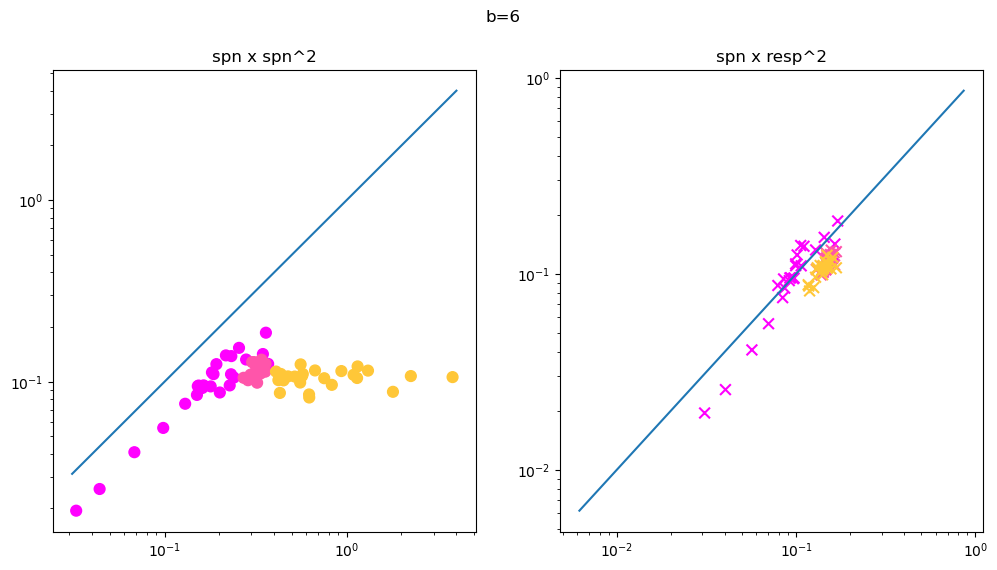

In [7]:
list_alpha=lrnspd_all_a["list_alpha"]
plot_alpha=[0.02,0.05,0.09]

axes=[]
fig=pl.figure(figsize=(12,6))
pl.suptitle("b=%g"%beta)
for i in range(2):
    axes.append(fig.add_subplot(1,2,i+1))

axes[0].set_title("spn x spn^2")
axes[1].set_title("spn x resp^2")
vmax,vmin=np.max(list_alpha),np.min(list_alpha)

xrang1,xrang2=[],[]

for ia,alpha in enumerate(list_alpha):
    if not np.round(alpha,10) in np.round(plot_alpha,10):
        continue
    y=lrnspd_all_a["lrnspd_emp"][ia][ib]
    x=lrnspd_all_a["spnspn"][ia][ib]
    xrang1.append([np.min(x),np.max(x)])
    axes[0].scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(x)),cmap="spring",s=60,marker="o")
    x=lrnspd_all_a["respspn"][ia][ib]
    xrang2.append([np.min(x),np.max(x)])
    axes[1].scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(x)),cmap="spring",s=60,marker="x")

xmin,xmax=np.min(np.array(xrang1))*0.95,np.max(np.array(xrang1))*1.05
x=np.linspace(xmin,xmax,4)
axes[0].plot(x,x)
xmin,xmax=np.min(np.array(xrang2))*0.2,np.max(np.array(xrang2))*5.05
x=np.linspace(xmin,xmax,4)
axes[1].plot(x,x)

for ax in axes:
    ax.set_xscale("log")
    ax.set_yscale("log")
pl.savefig("lrnspd_rnd_hopfJ_alpha.pdf")

#### beta dependence

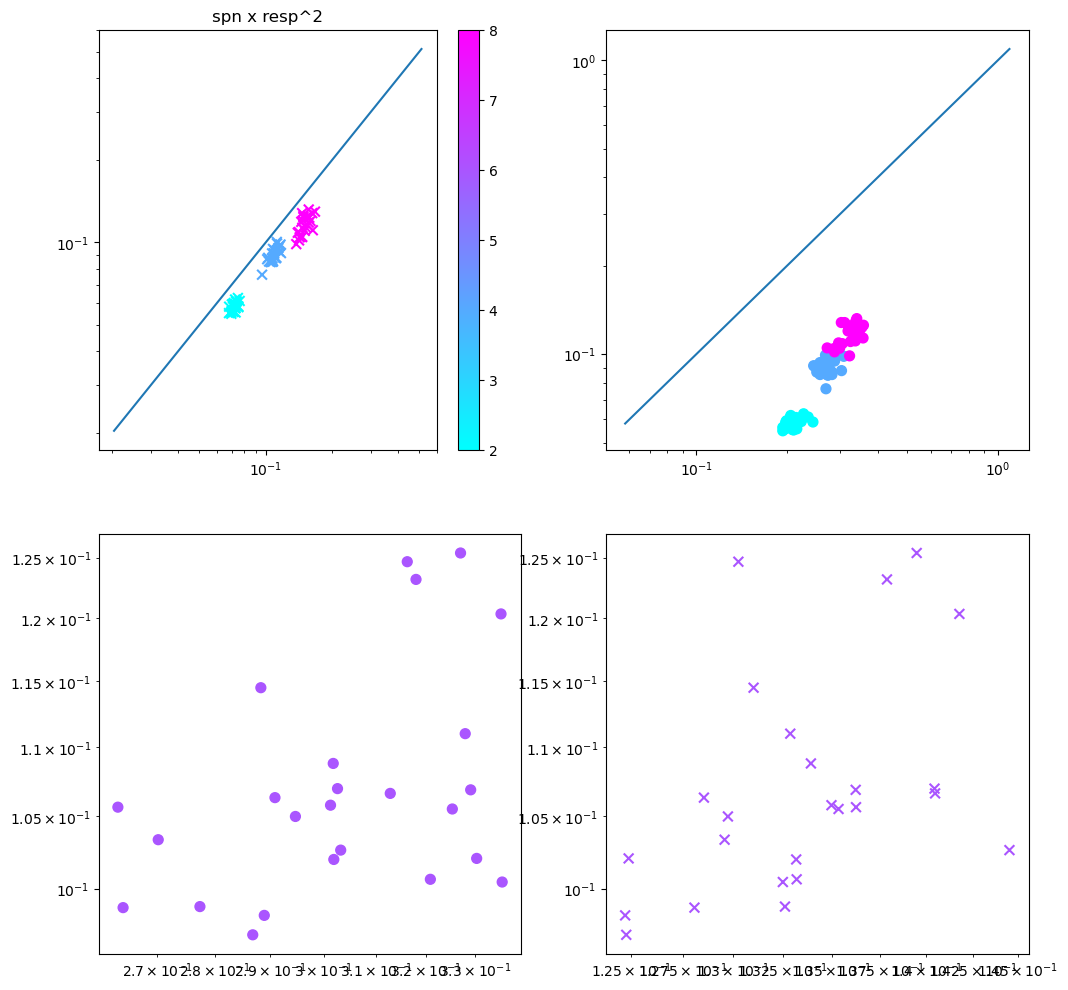

In [9]:
imp.reload(sf)
type_trgt_ipt="random_hopf"
type_J="hopf"
inet=0
alpha=0.05
lrnspd_all,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)

lrnspd_emp=lrnspd_all["lrnspd_emp"]
spn=spn_resp["spn_resp"]
spn_ipt=spn_resp["spn_ipt"]
resp=spn_resp["resp"]
lrnspd_spnspn=lrnspd_all["spnspn_hebb"]
lrnspd_respspn=lrnspd_all["respspn_hebb"]


plot_beta=[2,4,8]
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_rnd_hopf.pdf",_type_J=type_J,plot_beta=plot_beta,plot_expd_beta=[6])

#### other results on alpha dependence

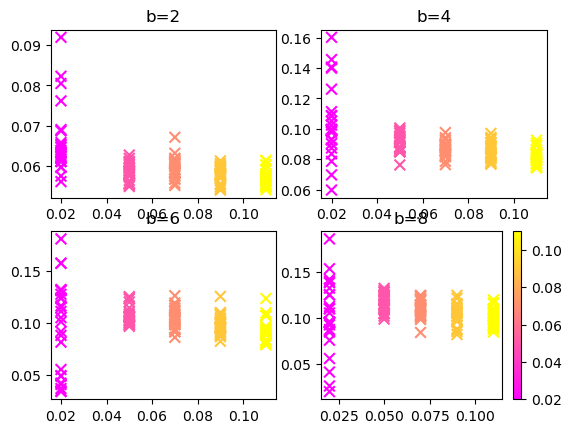

In [6]:
# gamma=0.5
pl.figure()
vmax,vmin=np.max(list_alpha),np.min(list_alpha)

for i in range(4):
    pl.subplot(2,2,i+1)
    ib=2+i*2
    pl.title("b=%g"%list_beta[ib])
    for ia,alpha in enumerate(list_alpha):
        im0=pl.scatter(alpha*np.ones(25),lrnspd_all_a["lrnspd_emp"][ia][ib],vmin=vmin,vmax=vmax,c=alpha*np.ones(25),cmap="spring",s=60,marker="x")
pl.colorbar()
pl.savefig("lrnspd_hopf_alpha.pdf")

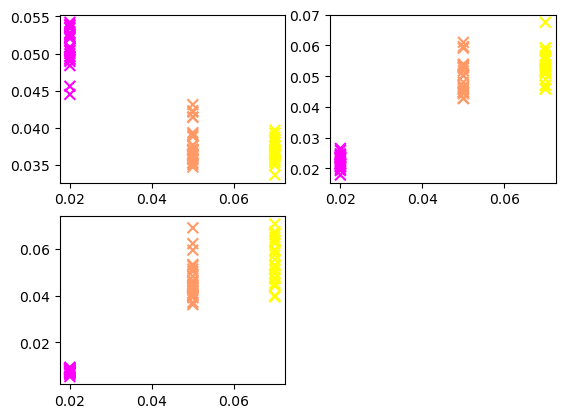

In [98]:
# gamma=0.3   gamma=0.3のときは以下のようにlrnspdはalphaによって増加するが、ターゲットへは収束しない。
pl.figure()
vmax,vmin=np.max(list_alpha),np.min(list_alpha)

for i in range(3):
    pl.subplot(2,2,i+1)

    for ia,alpha in enumerate(list_alpha):
        pl.scatter(alpha*np.ones(25),lrnspd_all_a["lrnspd_emp"][ia][i],vmin=vmin,vmax=vmax,c=alpha*np.ones(25),cmap="spring",s=60,marker="x")
    
pl.savefig("lrnspd_hopf_alpha_b%g.pdf"%beta)

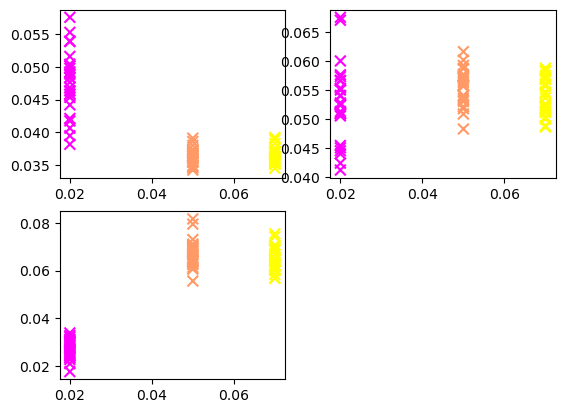

In [110]:
#gamma=0.4
pl.figure()
vmax,vmin=np.max(list_alpha),np.min(list_alpha)

for i in range(3):
    pl.subplot(2,2,i+1)

    for ia,alpha in enumerate(list_alpha):
        pl.scatter(alpha*np.ones(25),lrnspd_all_a["lrnspd_emp"][ia][i],vmin=vmin,vmax=vmax,c=alpha*np.ones(25),cmap="spring",s=60,marker="x")
    
pl.savefig("lrnspd_hopf_alpha_b%g.pdf"%beta)

In [135]:
dyn_lrn_a,Jtrgt_a,trgt_a=[],[],[]

for ia,alpha in enumerate(list_alpha):
    tmp=np.load("16th_data/lrndyn_hopfJ_random_hopfipt2_a%g_N512_inet0.npz"%alpha)

    Jtrgt=tmp["Jtrgt"]
    [ipt,trgt]=tmp["ipt_trgt"]
    list_beta=tmp["list_beta"]
    list_id=tmp["list_id"]
    Nmap=len(list_id)
    dyn_lrn=np.array([tmp["dyn"+str(i)] for i in range(Nmap*len(list_beta))])

    dyn_lrn_a.append(dyn_lrn)
    Jtrgt_a.append(Jtrgt)
    trgt_a.append(trgt)


In [127]:
%matplotlib qt
pl.figure()
ib=0
ipat=3
pl.subplot(1,3,1)
for i in range(3):
    tmp=(dyn_lrn_a[i][25*ib+ipat]-dyn_lrn_a[i][25*ib+ipat,1000])@trgt_a[i][:,ipat]/N
    pl.plot(tmp)
pl.xlim(1000,1010)
pl.ylim(-0.001,0.002)
    
pl.subplot(1,3,2)
for i in range(1,2):
    tmp=dyn_lrn_a[i][25*ib+ipat]@trgt_a[i][:,ipat]/N
    pl.plot(tmp)
    #tmp=dyn_lrn_a[i][25*ib+ipat][:,:10]
    #pl.plot(np.arange(len(tmp)),tmp)
    
pl.subplot(1,3,3)
for i in range(3):
    tmp=dyn_lrn_a[i][25*ib+ipat]@Jtrgt_a[i][:,0]/N
    pl.plot(tmp)

#### why the learning speed for alpha=0.02 is more diverged?

In [22]:
"""
tmp=np.load("16th_data/spn_hopfJ_a0.05_N512_inet0.npz")
Jtrgt=tmp["Jtrgt"]
list_beta=tmp["list_beta"]
Nmap=len(list_id)
dyn_lrn=tmp["dyn"]
"""
tmp=np.load("16th_data/lrndyn_hopfJ_random_hopfipt2_a0.05_N512_inet0.npz")
Jtrgt=tmp["Jtrgt"]
[ipt,trgt]=tmp["ipt_trgt"]
list_beta=tmp["list_beta"]
Nmap=len(tmp["list_id"])
dyn_tmp=np.array([tmp["dyn"+str(i)] for i in range(Nmap*len(list_beta))])           

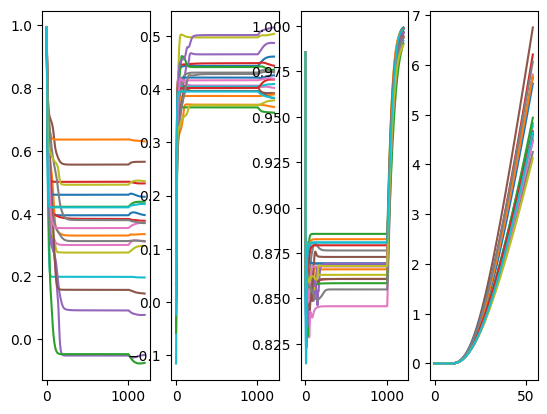

In [50]:
ib=4
pl.figure()
pl.subplot(1,4,1)
for ipat in range(20):
    pl.plot(dyn_tmp[ib*25+ipat]@Jtrgt[:,0]/N)
    
pl.subplot(1,4,2)
for ipat in range(20):
    pl.plot(dyn_tmp[ib*25+ipat]@trgt[:,ipat]/N)
    
pl.subplot(1,4,3)
for ipat in range(20):
    pl.plot( np.sum(  dyn_tmp[ib*25+ipat]**2,axis=1)/N)

    
pl.subplot(1,4,4)
for ipat in range(20):
    pl.plot( np.sum(  (dyn_tmp[ib*25+ipat][995:1050]-np.tile(dyn_tmp[ib*25+ipat][1003].reshape(1,-1),(55,1)) )**2,axis=1))


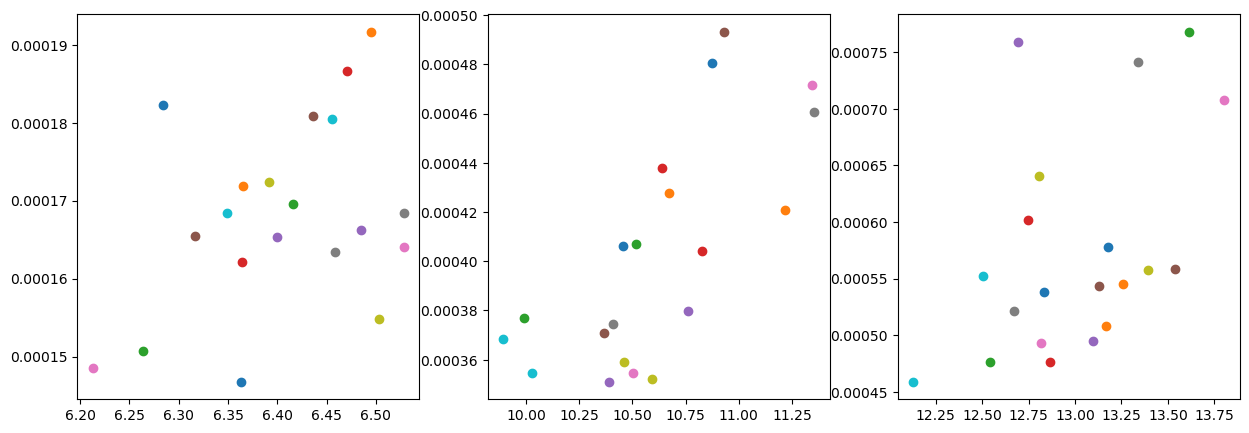

In [13]:
pl.figure(figsize=(15,5))

for ifig in range(3):
    pl.subplot(1,3,1+ifig)
    ib=[2,4,6][ifig]
    beta=list_beta[ib]
    for ipat in range(20):
        resp=dyn_tmp[ib*25+ipat][1003]
        resp_tmp=beta*resp/np.cosh(np.arctanh(resp))**2
        pl.scatter(np.mean(resp**2)*np.sqrt( np.sum(resp_tmp**2) ), np.mean(  (dyn_tmp[ib*25+ipat][1013]-resp)**2))


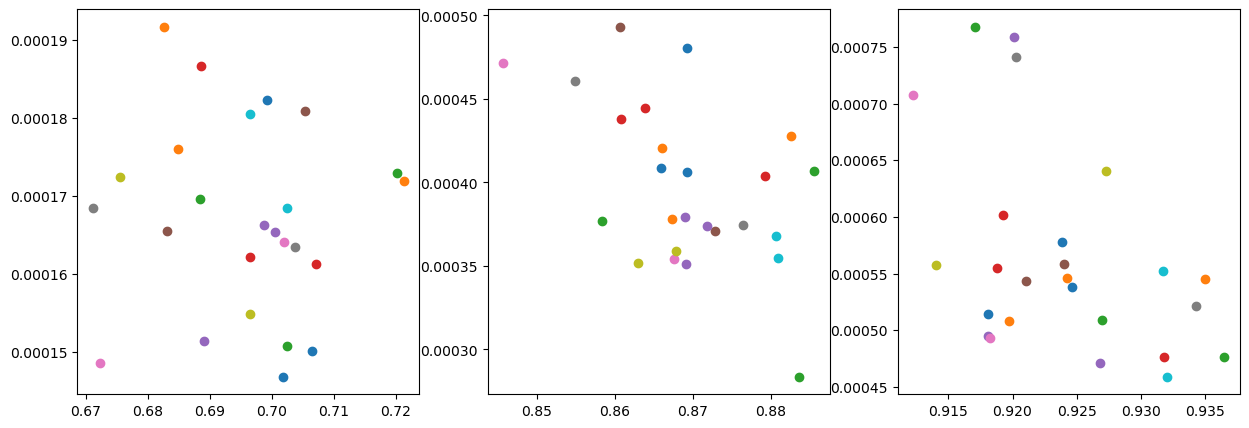

In [23]:
pl.figure(figsize=(15,5))

for ifig in range(3):
    pl.subplot(1,3,1+ifig)
    ib=[2,4,6][ifig]
    beta=list_beta[ib]
    for ipat in range(25):
        resp=dyn_tmp[ib*25+ipat][1003]
        pl.scatter(np.mean(resp**2), np.mean(  (dyn_tmp[ib*25+ipat][1013]-resp)**2))

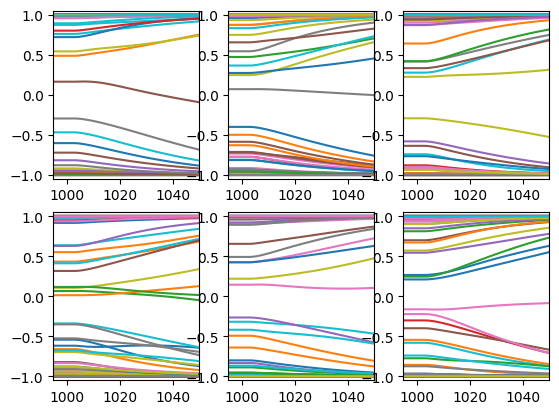

In [44]:
pl.figure()
for ipat in range(6):
    pl.subplot(2,3,ipat+1)
    for i in range(100):
        pl.plot(dyn_tmp[ib*25+ipat][:,i])
    pl.ylim(-1.05,1.05)
    pl.xlim(995,1050)
    

In [7]:
dyn_tmp.shape

(225, 1204, 512)

In [15]:
tmp=np.load("16th_data/lrndyn_hopfJ_random_hopfipt2_a0.02_N512_inet0.npz")
Jtrgt=tmp["Jtrgt"]
[ipt,trgt]=tmp["ipt_trgt"]
list_beta=tmp["list_beta"]
Nmap=len(tmp["list_id"])
dyn_tmp=np.array([tmp["dyn"+str(i)] for i in range(Nmap*len(list_beta))])           

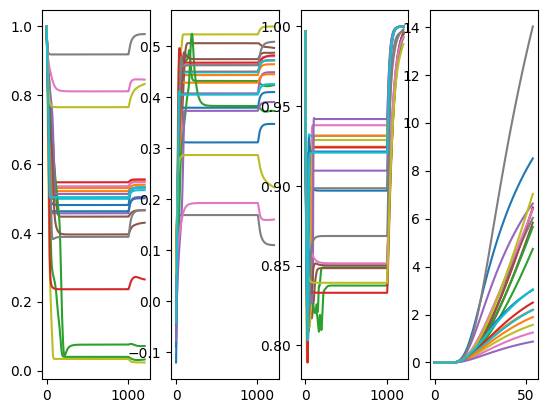

In [47]:
ib=4
pl.figure()
pl.subplot(1,4,1)
for ipat in range(20):
    pl.plot(dyn_tmp[ib*25+ipat]@Jtrgt[:,0]/N)
    
pl.subplot(1,4,2)
for ipat in range(20):
    pl.plot(dyn_tmp[ib*25+ipat]@trgt[:,ipat]/N)
    
pl.subplot(1,4,3)
for ipat in range(20):
    pl.plot( np.sum(  dyn_tmp[ib*25+ipat]**2,axis=1)/N)

    
pl.subplot(1,4,4)
for ipat in range(20):
    pl.plot( np.sum(  (dyn_tmp[ib*25+ipat][995:1050]-np.tile(dyn_tmp[ib*25+ipat][1003].reshape(1,-1),(55,1)) )**2,axis=1))


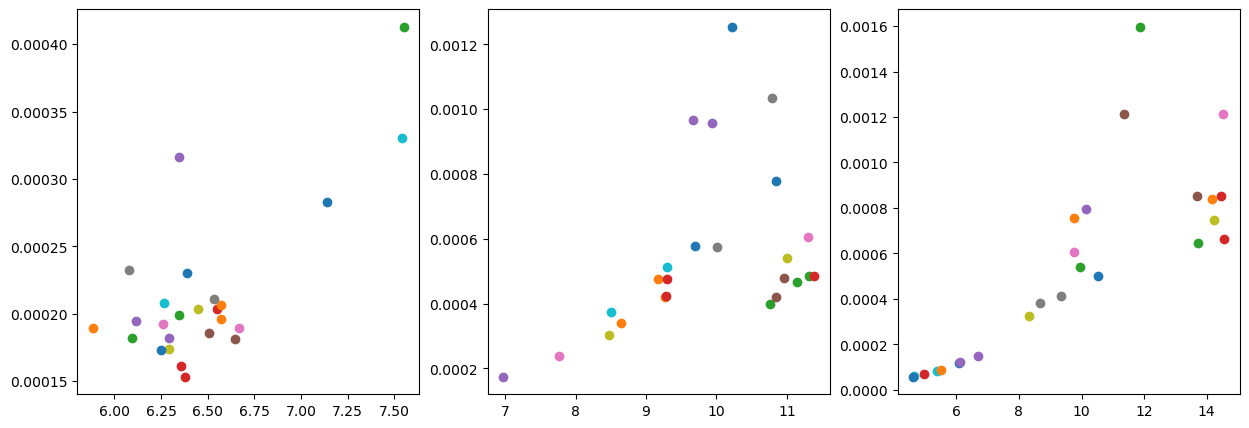

In [20]:
pl.figure(figsize=(15,5))

for ifig in range(3):
    pl.subplot(1,3,1+ifig)
    ib=[2,4,6][ifig]
    beta=list_beta[ib]
    for ipat in range(25):
        resp=dyn_tmp[ib*25+ipat][1003]
        resp_tmp=beta*resp/np.cosh(np.arctanh(resp))**2
        pl.scatter(np.mean(resp**2)*np.sqrt( np.sum(resp_tmp**2) ), np.mean(  (dyn_tmp[ib*25+ipat][1013]-resp)**2))


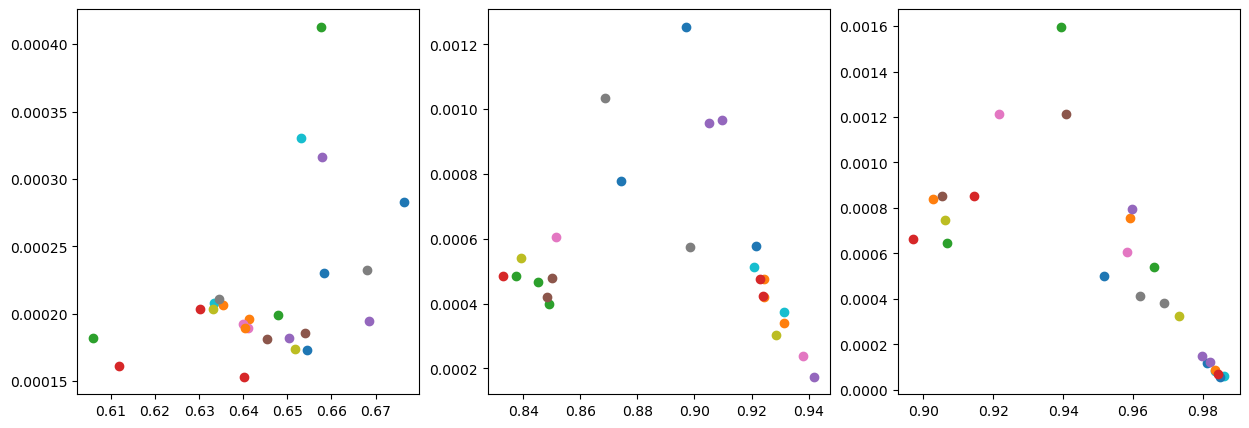

In [21]:
pl.figure(figsize=(15,5))

for ifig in range(3):
    pl.subplot(1,3,1+ifig)
    ib=[2,4,6][ifig]
    beta=list_beta[ib]
    for ipat in range(25):
        resp=dyn_tmp[ib*25+ipat][1003]
        pl.scatter(np.mean(resp**2), np.mean(  (dyn_tmp[ib*25+ipat][1013]-resp)**2))

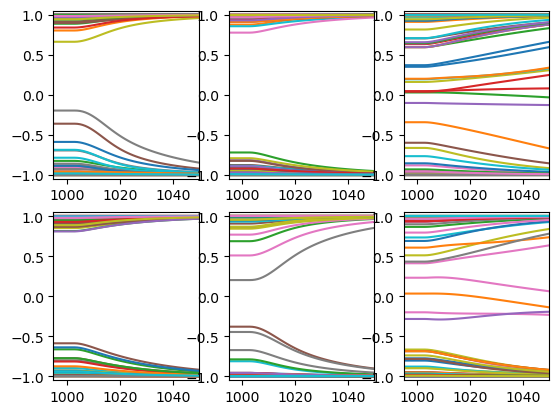

In [18]:
ib=4
pl.figure()
for ipat in range(6):
    pl.subplot(2,3,ipat+1)
    for i in range(100):
        pl.plot(dyn_tmp[ib*25+ipat][:,i])
    pl.ylim(-1.05,1.05)
    pl.xlim(995,1050)
        


#### others

(600.0, 700.0)

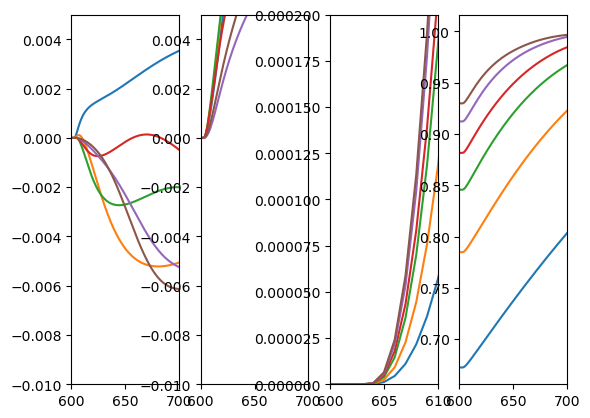

In [28]:
alpha=0.05
tmp=np.load("16th_data/lrndyn_hopfJ_random_hopfipt2_a%g_N512_inet0.npz"%alpha)

Jtrgt=tmp["Jtrgt"]
[ipt,trgt]=tmp["ipt_trgt"]
list_beta=tmp["list_beta"]
list_id=tmp["list_id"]
Nmap=len(list_id)
dyn_lrn=np.array([tmp["dyn"+str(i)] for i in range(Nmap*len(list_beta))])
    


ipat=6
pl.figure()
pl.subplot(1,4,1)
for i in range(6):
    tmp=(dyn_lrn[25*(2+i)+ipat]-dyn_lrn[25*(2+i)+ipat,600])@trgt[:,ipat]/N
    pl.plot(tmp)
pl.xlim(600,700)
pl.ylim(-0.01,0.005)

pl.subplot(1,4,2)
for i in range(6):
    tmp=(dyn_lrn[25*(2+i)+ipat]-dyn_lrn[25*(2+i)+ipat,600])@Jtrgt[:,0]/N
    pl.plot(tmp)
pl.xlim(600,700)
pl.ylim(-0.01,0.005)


pl.subplot(1,4,3)
for i in range(6):
    tmp=np.mean((dyn_lrn[25*(2+i)+ipat]-dyn_lrn[25*(2+i)+ipat,600])**2,axis=1)
    pl.plot(tmp)
pl.xlim(600,610)
pl.ylim(0.0,0.0002)


pl.subplot(1,4,4)
for i in range(6):
    tmp=np.mean(dyn_lrn[25*(2+i)+ipat]**2,axis=1)
    pl.plot(tmp)
pl.xlim(600,700)


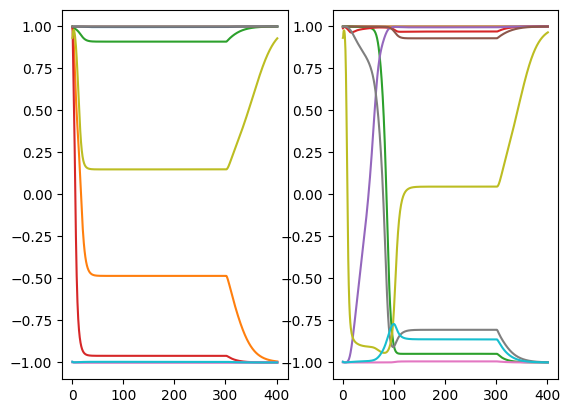

In [56]:
pl.figure()
pl.subplot(1,2,1)
pl.plot(np.arange(len(dyn_lrn[0]))*0.5,dyn_lrn[25*3+22][:,:10])

pl.subplot(1,2,2)
pl.plot(np.arange(len(dyn_lrn[0]))*0.5,dyn_lrn[25*3+23][:,:10])

In [38]:
imp.reload(sf)
type_trgt_ipt="random_hopf"
type_J="hopf"
inet=0
alpha=0.05
lrnspd_all,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)

lrnspd_emp=lrnspd_all["lrnspd_emp"]
spn=spn_resp["spn_resp"]
spn_ipt=spn_resp["spn_ipt"]
resp=spn_resp["resp"]
lrnspd_spnspn=lrnspd_all["spnspn_hebb"]
lrnspd_respspn=lrnspd_all["respspn_hebb"]

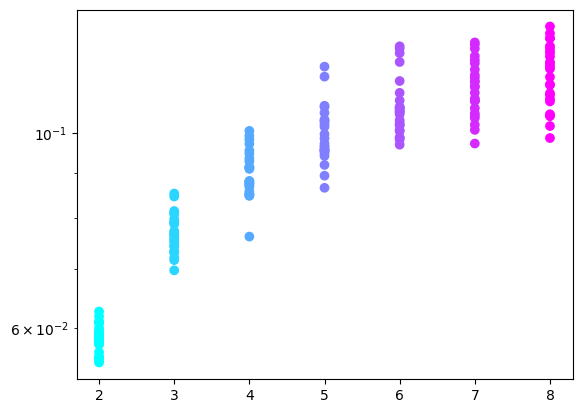

In [39]:
pl.figure()
vmax,vmin=8,2

for ib, beta in enumerate(list_beta):
    if ib>=2:
        y=lrnspd_emp[ib]
        ntmp=np.ones(len(y))
        pl.scatter(beta*ntmp,y,cmap="cool",vmax=vmax,vmin=vmin,c=beta*ntmp)
    
pl.yscale("log")
pl.savefig("lrnspd_hopf_beta.pdf")

/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:914: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im0)


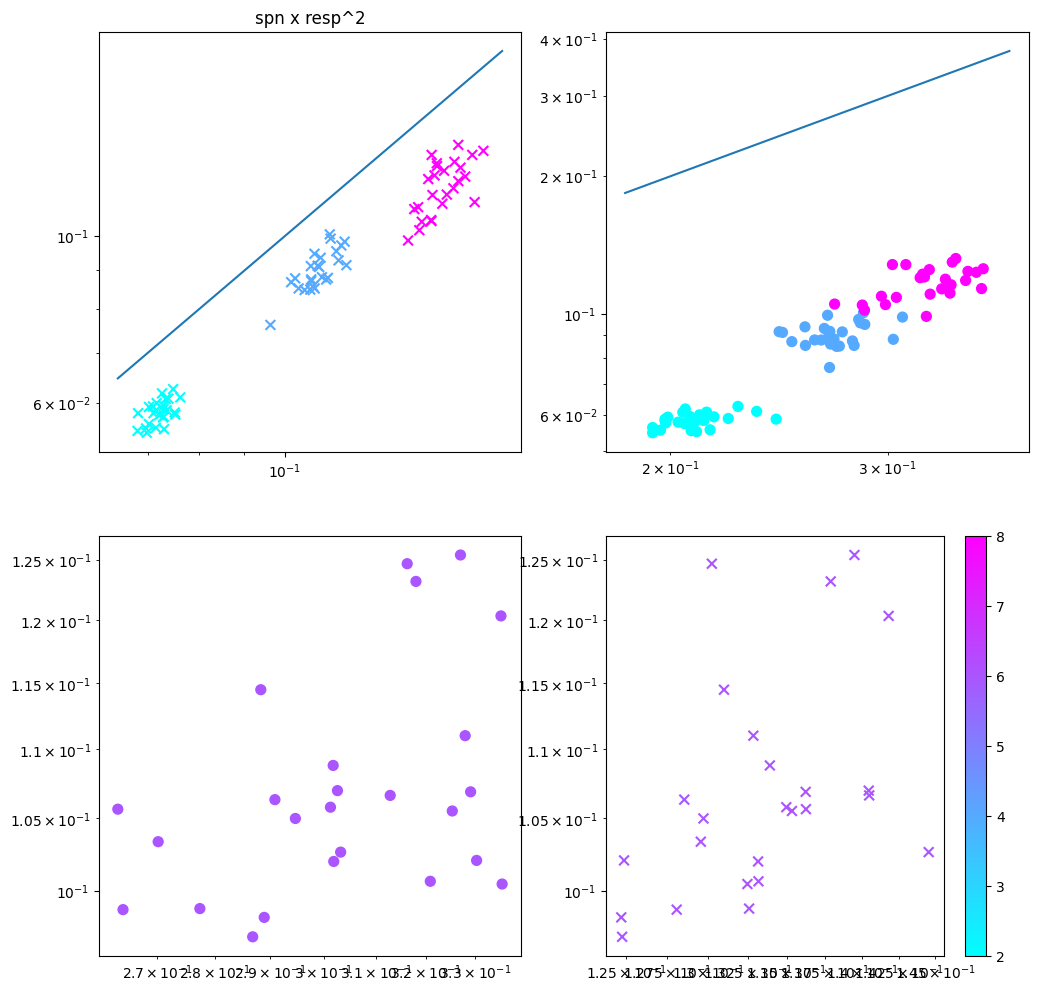

In [42]:
imp.reload(sf)
plot_beta=[2,4,8]
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_rnd_hopf.pdf",_type_J=type_J,plot_beta=plot_beta,plot_expd_beta=[6])

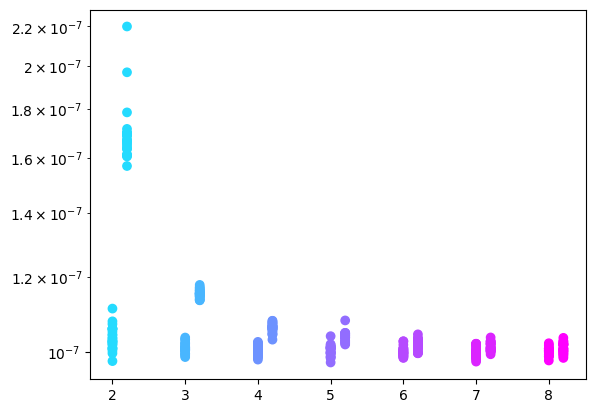

In [191]:
inet=0

tmp=np.load(ADR+"spn_hopfJ_a0.05_N512_inet%d.npz"%inet,allow_pickle=True)
dyn_noise_all,J,list_beta=tmp["dyn"],tmp["J"],tmp["list_beta"]
Jtrgt=tmp["Jtrgt"]

tmp0=sf.gen_random_pat(Jtrgt,[],len(Jtrgt[0]))
rnd=np.where(tmp0>0,1,-1)


spn_trgt=np.var(dyn_noise_all[:,3000:]@Jtrgt/N,axis=1).reshape(9,5,-1)
spn_rnd=np.var(dyn_noise_all[:,3000:]@rnd/N,axis=1).reshape(9,5,-1)

pl.figure()

vmax,vmin=np.max(list_beta),np.min(list_beta)
for ib,beta in enumerate(list_beta):
    if ib in [2,3,4,5,6,7,8]:
        ntmp=np.ones(len(spn_trgt[ib,0]))
        pl.scatter((beta+0.2)*ntmp,np.mean(spn_trgt[ib],axis=0),cmap="cool",vmax=vmax,vmin=vmin,c=beta*ntmp)
        pl.scatter(beta*ntmp,np.mean(spn_rnd[ib],axis=0),cmap="cool",vmax=vmax,vmin=vmin,c=beta*ntmp)
    
pl.yscale("log")
pl.savefig("comp_var_hopf_beta.pdf")

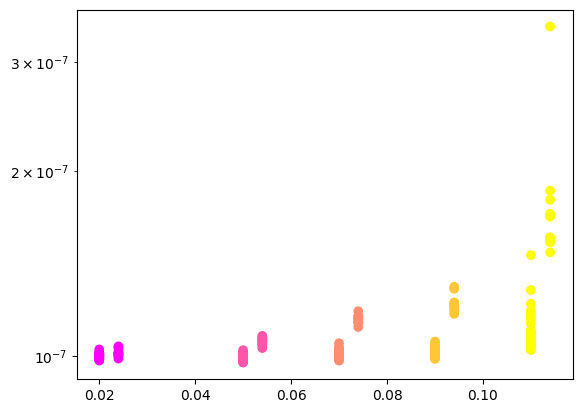

In [23]:
ib=4
beta=list_beta[ib]
inet=0

list_alpha=[0.02,0.05,0.07,0.09,0.11]

spn_trgt,spn_rnd=[],[]

for alpha in list_alpha:
    tmp=np.load(ADR+"spn_hopfJ_a%g_N512_inet%d.npz"%(alpha,inet),allow_pickle=True)
    dyn_noise_all,J,list_beta=tmp["dyn"],tmp["J"],tmp["list_beta"]
    Jtrgt=tmp["Jtrgt"]

    tmp0=sf.gen_random_pat(Jtrgt,[],30)
    rnd=np.where(tmp0>0,1,-1)


    spn_trgt.append(  np.mean((np.var(dyn_noise_all[:,3000:]@Jtrgt[:,:10]/N,axis=1).reshape(9,5,-1))[ib], axis=0) )
    spn_rnd.append( np.mean((np.var(dyn_noise_all[:,3000:]@rnd/N,axis=1).reshape(9,5,-1))[ib], axis=0) )

spn_trgt=np.array(spn_trgt)
spn_rnd=np.array(spn_rnd)

pl.figure()

vmax,vmin=np.max(list_alpha),np.min(list_alpha)
for ia,alpha in enumerate(list_alpha):
    ntmp=np.ones(len(spn_trgt[ia]))
    pl.scatter((alpha+0.004)*ntmp,spn_trgt[ia],cmap="spring",vmax=vmax,vmin=vmin,c=alpha*ntmp)
    ntmp=np.ones(len(spn_rnd[ia]))
    pl.scatter((alpha)*ntmp,spn_rnd[ia],cmap="spring",vmax=vmax,vmin=vmin,c=alpha*ntmp)
    
pl.yscale("log")
pl.savefig("comp_var_hopf_alpha_b%g.pdf"%beta)

### trgt in embJ

In [117]:
imp.reload(sf)
type_trgt_ipt="trgt_preemb"
type_J="preemb"
inet=0
alpha=0.1
lrnspd_all,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)

/Users/tomoki/Dropbox/research/programs/Bif_Anlys/suscept_funcs.py:878: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im0)


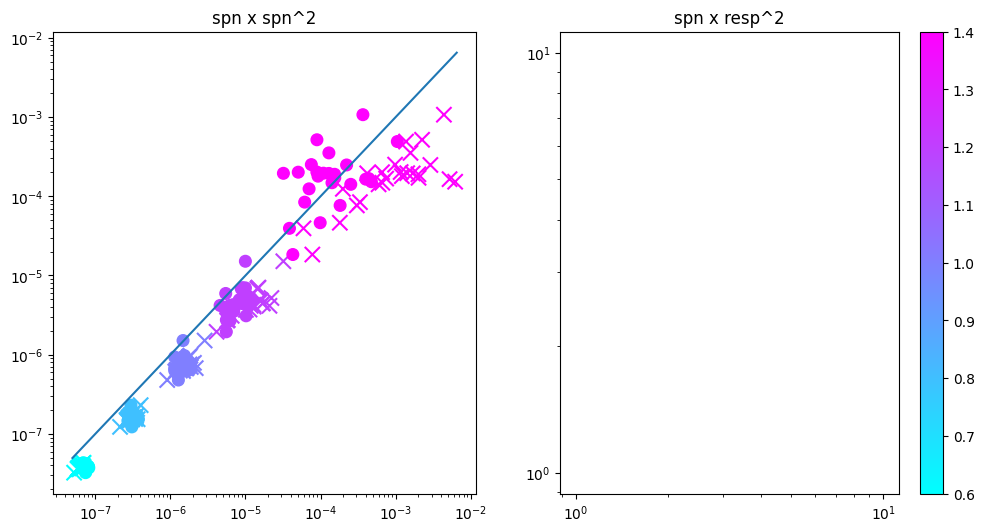

In [104]:
imp.reload(sf)
sf.gen_fig_lrnspd(lrnspd_all,list_beta,"lrnspd_trgt3_embJ.pdf",plot_beta=[0.6,0.8,1.0,1.2,1.4])

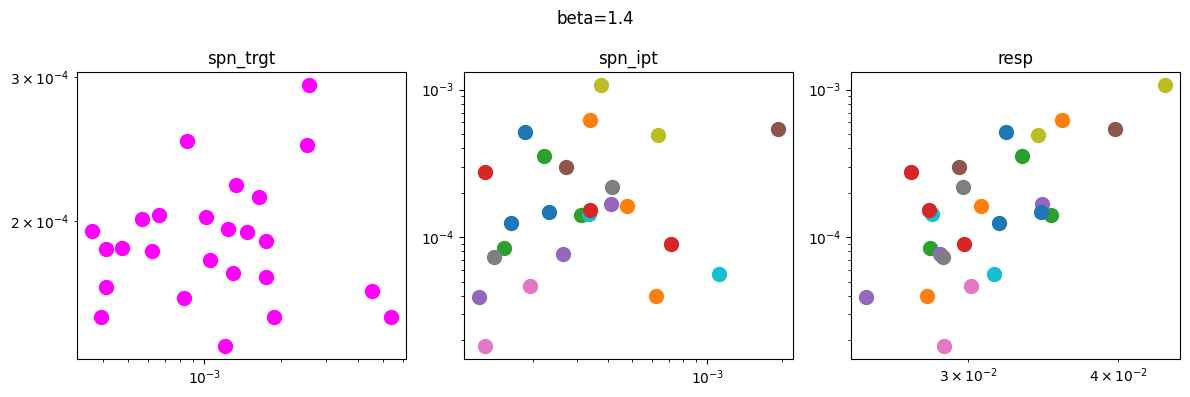

In [120]:
## Tresp in calculation of resp value makes a little change in the trend
ib=8

fig=pl.figure(figsize=(12,4))
fig.suptitle("beta=%g"%list_beta[ib])
axes=[]
for i in range(3):
    axes.append(fig.add_subplot(1,3,i+1))
axes[0].set_title("spn_trgt")
axes[1].set_title("spn_ipt")
axes[2].set_title("resp")

j=0
for k in range(25,50):
    y=lrnspd_all["lrnspd_emp"][ib][k]
    axes[0].scatter(spn_resp["spn_trgt"][ib][k],y,c=cset[j],marker="o",s=100)
    
k=0
for j in range(25):
    y=lrnspd_all["lrnspd_emp"][ib][j]
    axes[1].scatter(spn_resp["spn_ipt"][ib][j],y,marker=tset[k],s=100)
    axes[2].scatter(np.linalg.norm(spn_resp["resp"][ib*25+j]),y,marker=tset[k],s=100)

for i in range(3):
    axes[i].set_xscale("log")
    axes[i].set_yscale("log")
pl.tight_layout()
pl.savefig("lrnspd_trgt_embJ_b%g.pdf"%list_beta[ib])

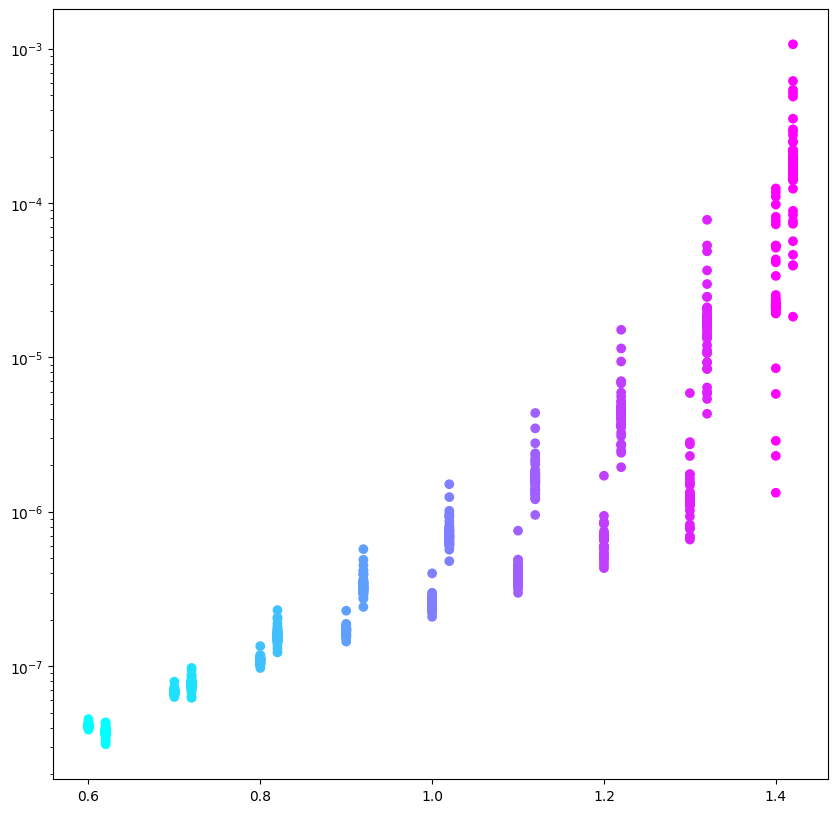

In [109]:
# ipt3 -> ipt2

imp.reload(sf)
type_J="preemb"
inet=0
alpha=0.1


#type_trgt_ipt="trgt_preemb"
#lrnspd_all_t,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)
#lrnspd_all_t=copy.deepcopy(lrnspd_all)

#type_trgt_ipt="random_preemb"
#lrnspd_all_r,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)


vmin,vmax=np.min(list_beta),np.max(list_beta)

pl.figure(figsize=(10,10))
for ib,beta in enumerate(list_beta):
    yr,yt=lrnspd_all_r["lrnspd_emp"][ib],lrnspd_all_t["lrnspd_emp"][ib]
    xr,xt=beta*np.ones(len(yr)),beta*np.ones(len(yt))+0.02

    pl.scatter(xr,yr,cmap="cool",c=xr,vmax=vmax,vmin=vmin)
    pl.scatter(xt,yt,cmap="cool",c=xr,vmax=vmax,vmin=vmin)
    
pl.yscale("log")
pl.savefig("comp_lrnspd_embJ.pdf")

### random in emb J  (alpha dependence)

In [3]:
inet=0
type_J="preemb"
type_trgt_ipt="random_preemb"
ib=0

list_alpha=[0.1,0.2,0.3,0.4,0.5,0.6]
list_beta=[0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4]
beta=list_beta[ib]

lrnspd_all_a=dict()
y,x1,x2=[],[],[]
for ia,alpha in enumerate(list_alpha):
    lrnspd_tmp,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)
    y.append(lrnspd_tmp["lrnspd_emp"][ib])
    x1.append(np.linalg.norm(lrnspd_tmp["spnspn"][ib][:,:,0],axis=1))
    x2.append(np.linalg.norm(lrnspd_tmp["respspn"][ib][:,:,0],axis=1))
    
lrnspd_all_a["lrnspd_emp"]=y
lrnspd_all_a["spnspn"]=x1
lrnspd_all_a["respspn"]=x2
lrnspd_all_a["list_alpha"]=list_alpha
lrnspd_all_a["beta"]=beta

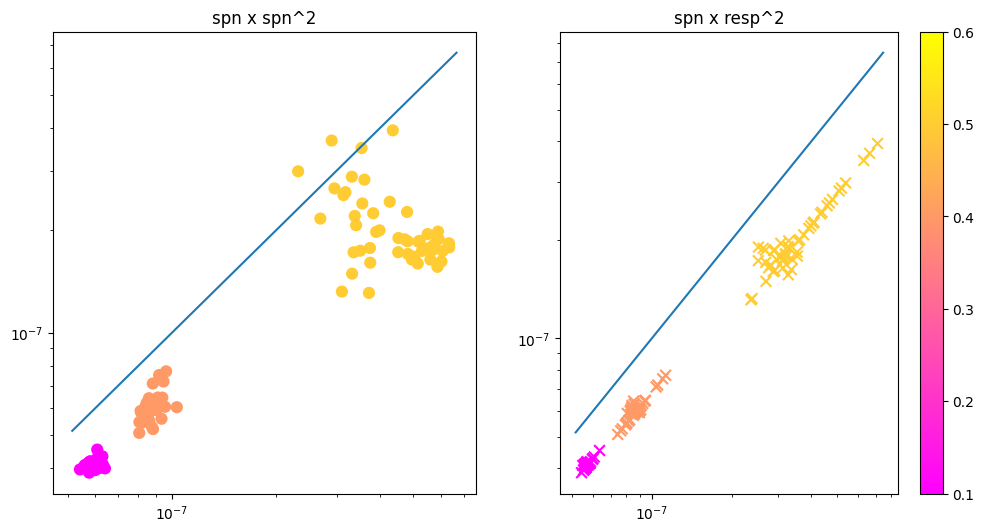

In [128]:
list_alpha=lrnspd_all_a["list_alpha"]
plot_alpha=[0.1,0.4,0.5]

axes=[]
fig=pl.figure(figsize=(12,6))
for i in range(2):
    axes.append(fig.add_subplot(1,2,i+1))

axes[0].set_title("spn x spn^2")
axes[1].set_title("spn x resp^2")
vmax,vmin=np.max(list_alpha),np.min(list_alpha)

xrang1,xrang2=[],[]

for ia,alpha in enumerate(list_alpha):
    if not np.round(alpha,10) in np.round(plot_alpha,10):
        continue
    y=lrnspd_all_a["lrnspd_emp"][ia]
    x=lrnspd_all_a["spnspn"][ia]
    xrang1.append([np.min(x),np.max(x)])
    axes[0].scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(x)),cmap="spring",s=60,marker="o")
    x=lrnspd_all_a["respspn"][ia]
    xrang2.append([np.min(x),np.max(x)])
    im0=axes[1].scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(x)),cmap="spring",s=60,marker="x")

xmin,xmax=np.min(np.array(xrang1))*0.95,np.max(np.array(xrang1))*1.05
x=np.linspace(xmin,xmax,4)
axes[0].plot(x,x)
xmin,xmax=np.min(np.array(xrang2))*0.95,np.max(np.array(xrang2))*1.05
x=np.linspace(xmin,xmax,4)
axes[1].plot(x,x)

for ax in axes:
    ax.set_xscale("log")
    ax.set_yscale("log")
fig.colorbar(im0)
pl.savefig("lrnspd_rnd_embJ_alpha.pdf")

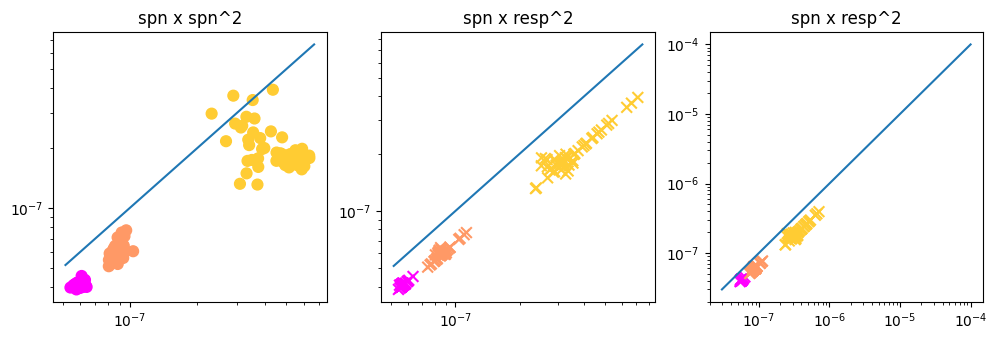

In [10]:
list_alpha=lrnspd_all_a["list_alpha"]
plot_alpha=[0.1,0.4,0.5]

axes=[]
fig=pl.figure(figsize=(12,3.5))
for i in range(3):
    axes.append(fig.add_subplot(1,3,i+1))

axes[0].set_title("spn x spn^2")
axes[1].set_title("spn x resp^2")
axes[2].set_title("spn x resp^2")
vmax,vmin=np.max(list_alpha),np.min(list_alpha)

xrang1,xrang2=[],[]

for ia,alpha in enumerate(list_alpha):
    if not np.round(alpha,10) in np.round(plot_alpha,10):
        continue
    y=lrnspd_all_a["lrnspd_emp"][ia]
    x=lrnspd_all_a["spnspn"][ia]
    xrang1.append([np.min(x),np.max(x)])
    axes[0].scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(x)),cmap="spring",s=60,marker="o")
    x=lrnspd_all_a["respspn"][ia]
    xrang2.append([np.min(x),np.max(x)])
    im0=axes[1].scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(x)),cmap="spring",s=60,marker="x")
    axes[2].scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(x)),cmap="spring",s=60,marker="x")

xmin,xmax=np.min(np.array(xrang1))*0.95,np.max(np.array(xrang1))*1.05
x=np.linspace(xmin,xmax,4)
axes[0].plot(x,x)
xmin,xmax=np.min(np.array(xrang2))*0.95,np.max(np.array(xrang2))*1.05
x=np.linspace(xmin,xmax,4)
axes[1].plot(x,x)
xmin,xmax=3e-8,1e-4
x=np.linspace(xmin,xmax,4)
axes[2].plot(x,x)

for ax in axes:
    ax.set_xscale("log")
    ax.set_yscale("log")
#fig.colorbar(im0)
pl.savefig("lrnspd_rnd_embJ_alpha.pdf")

### trgt in emb J  (alpha dependence)

In [26]:
inet=0
type_J="preemb"
type_trgt_ipt="trgt_preemb"
ib=0

list_alpha=[0.1,0.2,0.3,0.4,0.5,0.6]
list_beta=[0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4]
beta=list_beta[ib]

lrnspd_all_a=dict()
y,x1,x2=[],[],[]
for ia,alpha in enumerate(list_alpha):
    lrnspd_tmp,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)
    y.append(lrnspd_tmp["lrnspd_emp"][ib])
    x1.append(np.linalg.norm(lrnspd_tmp["spnspn"][ib][:,:,0],axis=1))
    x2.append(np.linalg.norm(lrnspd_tmp["respspn"][ib][:,:,0],axis=1))
    
lrnspd_all_a["lrnspd_emp"]=y
lrnspd_all_a["spnspn"]=x1
lrnspd_all_a["respspn"]=x2
lrnspd_all_a["list_alpha"]=list_alpha
lrnspd_all_a["beta"]=beta

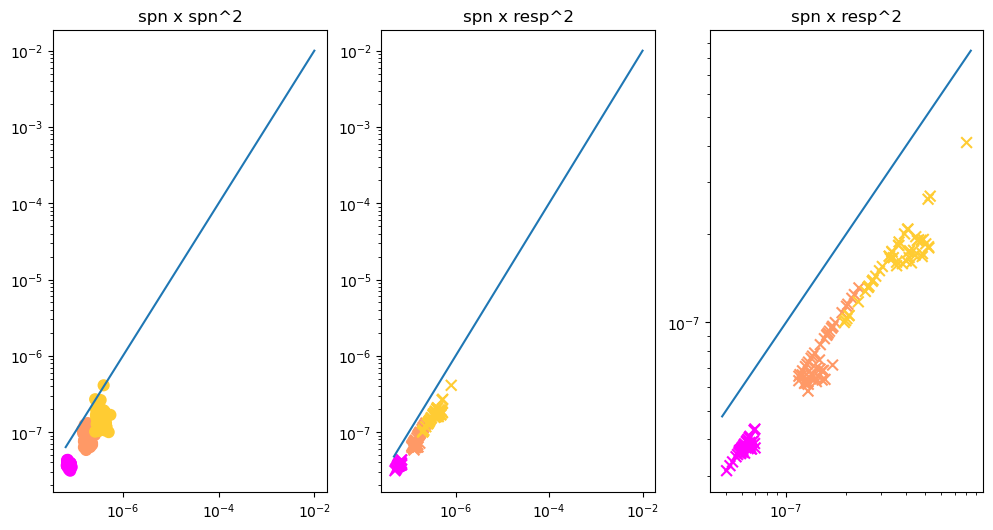

In [29]:
list_alpha=lrnspd_all_a["list_alpha"]
plot_alpha=[0.1,0.4,0.5]

axes=[]
fig=pl.figure(figsize=(12,6))
for i in range(3):
    axes.append(fig.add_subplot(1,3,i+1))

axes[0].set_title("spn x spn^2")
axes[1].set_title("spn x resp^2")
axes[2].set_title("spn x resp^2")
vmax,vmin=np.max(list_alpha),np.min(list_alpha)

xrang1,xrang2=[],[]

for ia,alpha in enumerate(list_alpha):
    if not np.round(alpha,10) in np.round(plot_alpha,10):
        continue
    y=lrnspd_all_a["lrnspd_emp"][ia]
    x=lrnspd_all_a["spnspn"][ia]
    xrang1.append([np.min(x),np.max(x)])
    axes[0].scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(x)),cmap="spring",s=60,marker="o")
    x=lrnspd_all_a["respspn"][ia]
    xrang2.append([np.min(x),np.max(x)])
    axes[1].scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(x)),cmap="spring",s=60,marker="x")
    axes[2].scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(x)),cmap="spring",s=60,marker="x")
    
xmin,xmax=np.min(np.array(xrang1))*0.95,np.max(np.array(xrang1))*1.05
xmax=1e-2
x=np.linspace(xmin,xmax,4)
axes[0].plot(x,x)
xmin,xmax=np.min(np.array(xrang2))*0.95,np.max(np.array(xrang2))*1.05
xmax=1e-2
x=np.linspace(xmin,xmax,4)
axes[1].plot(x,x)

xmin,xmax=np.min(np.array(xrang2))*0.95,np.max(np.array(xrang2))*1.05
x=np.linspace(xmin,xmax,4)
axes[2].plot(x,x)

for ax in axes:
    ax.set_xscale("log")
    ax.set_yscale("log")
pl.savefig("lrnspd_trgt_embJ_alpha.pdf")

In [21]:
inet=0
type_J="preemb"

ib=0

list_alpha=[0.1,0.2,0.3,0.4,0.5]
list_beta=[0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4]
beta=list_beta[ib]

#"""
type_trgt_ipt="random_preemb"
lrnspd_all_r=dict()
y,x1,x2=[],[],[]
for ia,alpha in enumerate(list_alpha):
    lrnspd_tmp,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)
    y.append(lrnspd_tmp["lrnspd_emp"][ib])
    
lrnspd_all_r["lrnspd_emp"]=y
#"""

lrnspd_all_t=dict()
#"""
type_trgt_ipt="trgt_preemb"

y,x1,x2=[],[],[]
for ia,alpha in enumerate(list_alpha):
    lrnspd_tmp,list_beta,spn_resp=sf.gen_lrnspd_alltypes(type_trgt_ipt,type_J,inet,alpha=alpha)
    y.append(lrnspd_tmp["lrnspd_emp"][ib])
    
lrnspd_all_t["lrnspd_emp"]=y
#"""
#lrnspd_all_t["lrnspd_emp"]=copy.deepcopy(lrnspd_all_a["lrnspd_emp"])

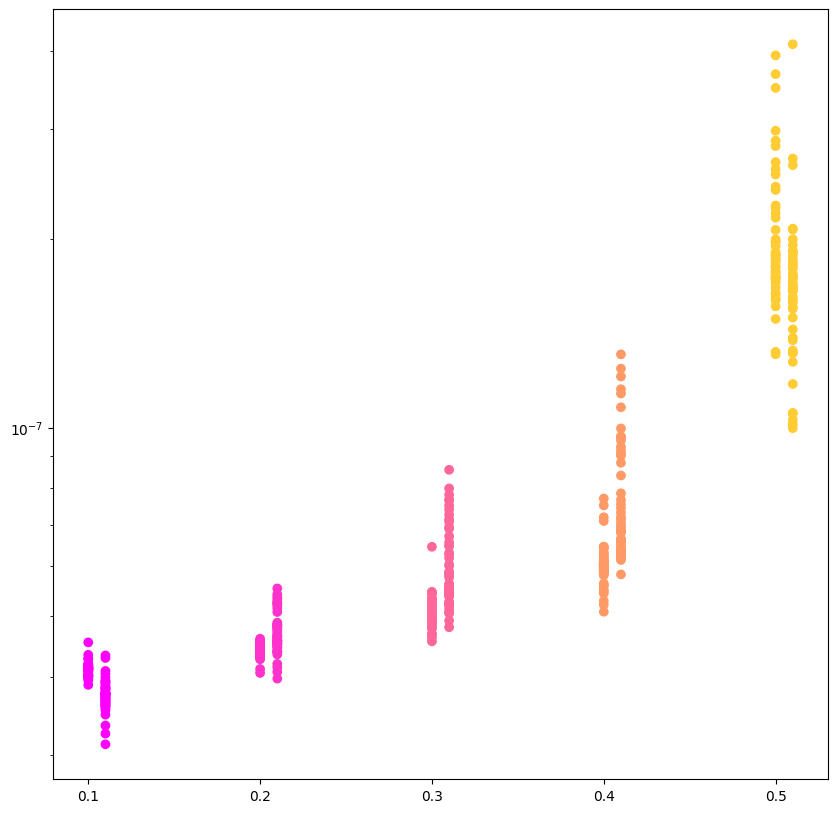

In [22]:
pl.figure(figsize=(10,10))
vmin,vmax=np.min(list_alpha),0.6#np.max(list_alpha)

for ia,alpha in enumerate(list_alpha):
    yr,yt=lrnspd_all_r["lrnspd_emp"][ia],lrnspd_all_t["lrnspd_emp"][ia]
    xr,xt=alpha*np.ones(len(yr)),alpha*np.ones(len(yt))+0.01

    pl.scatter(xr,yr,cmap="spring",c=xr,vmax=vmax,vmin=vmin)
    pl.scatter(xt,yt,cmap="spring",c=xr,vmax=vmax,vmin=vmin)
    
pl.yscale("log")
pl.savefig("comp_lrnspd_embJ_alpha.pdf")

##  entire learning process

## random asym

In [82]:
inet=0
type_J="random_asym"
type_trgt_ipt="entire_lrn_eig"

tmp=sf.load_fulllrn_data(inet,type_J,type_trgt_ipt)
list_beta=tmp["list_beta"]
[ipt,trgt]=tmp["ipt_trgt"]
dyn_label=tmp["dyn_label"]
dyn_lrn=[tmp["dyn"+str(i)] for i in range(len(dyn_label))]
#t=[i[:,0] for i in dyn_lrn]
#dyn_lrn=[i[:,1:] for i in dyn_lrn]   # in later version of data, time stamp is not included.
list_id=tmp["list_id"]
Nmap=len(list_id)
dt=tmp["dt"]
Tbin=tmp["Tbin"]
J=tmp["J"]
eigs=np.linalg.eig(J)

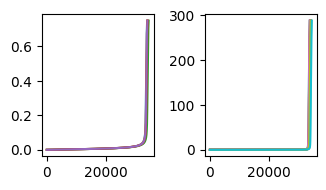

In [76]:
pl.figure(figsize=(5,2))
pl.subplot(1,3,1)
for i in range(0,10,2):
    #print(dyn_label[i])
    pl.plot(np.arange(len(dyn_lrn[i]))*(dt*Tbin),dyn_lrn[i] @ trgt[:,i]/N)
#pl.yscale("log")

pl.subplot(1,3,2)
for i in range(0,Nmap,2):
    pl.plot(np.arange(len(dyn_lrn[i]))*(dt*Tbin),np.sum(dyn_lrn[i]**2,axis=1) )
    
    
pl.tight_layout()

0.1
[0.1 0.2 0.3 0.4 0.5 0.6]
20 10
20 10
20 10
20 10


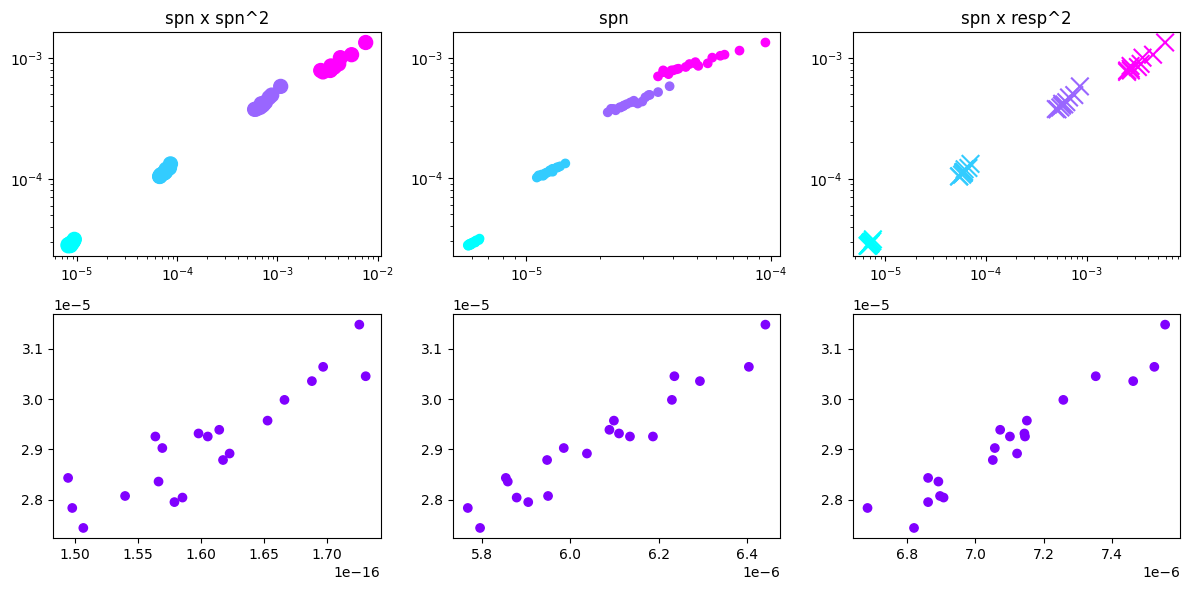

In [85]:
imp.reload(sf)
inet=0
type_J,type_trgt_ipt="random_asym","entire_lrn_eig"
sf.gen_figs_entire_lrn(inet,type_J,type_trgt_ipt,"fulllrnspd_eig_asymJ.pdf")

0.1
[0.1 0.2 0.3 0.4 0.5 0.6]
20 10
20 10
20 10
20 10


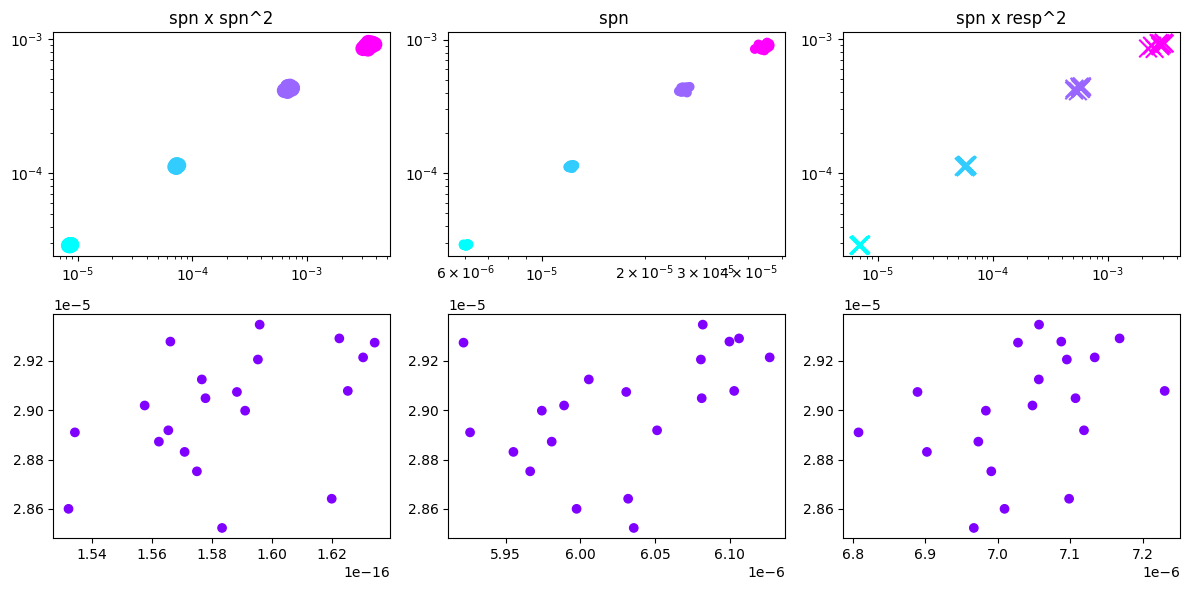

In [84]:
imp.reload(sf)
inet=0
type_J,type_trgt_ipt="random_asym","entire_lrn_random"
sf.gen_figs_entire_lrn(inet,type_J,type_trgt_ipt,"fulllrnspd_rand_asymJ.pdf")

###   eig pat in rand J

In [34]:
inet=0
type_J="random_sym"
type_trgt_ipt="entire_lrn_random"

tmp=sf.load_fulllrn_data(inet,type_J,type_trgt_ipt)
list_beta=tmp["list_beta"]
[ipt,trgt]=tmp["ipt_trgt"]
dyn_label=tmp["dyn_label"]
dyn_lrn=[tmp["dyn"+str(i)] for i in range(len(dyn_label))]
t=[i[:,0] for i in dyn_lrn]
dyn_lrn=[i[:,1:] for i in dyn_lrn]
list_id=tmp["list_id"]
Nmap=len(list_id)
dt=tmp["dt"]
Tbin=tmp["Tbin"]
J=tmp["J"]
eigs=np.linalg.eig(J)


In [ ]:
pl.figure()
pl.subplot(1,3,1)
for i in range(0,10,2):
    print(dyn_label[i])
    pl.plot(np.arange(len(dyn_lrn[i]))*(dt*Tbin),dyn_lrn[i] @ trgt[:,i]/N)
#pl.yscale("log")

pl.subplot(1,3,2)
for i in range(0,Nmap,2):
    pl.plot(np.arange(len(dyn_lrn[i]))*(dt*Tbin),np.sum(dyn_lrn[i]**2,axis=1) )
    
    
tmp=np.load(ADR+"fulllrndyn_fine_rndJ_eig_N512_inet0.npz")
list_beta=tmp["list_beta"]
[ipt,trgt]=tmp["ipt_trgt"]
dyn_lrn=[tmp["dyn"+str(i)] for i in range(len(ipt[0]))]
list_id=tmp["list_id"]
Nmap=len(list_id)
dt=0.05
Tbin=1

pl.subplot(1,3,3)
for i in range(0,Nmap,2):
    pl.plot(np.arange(len(dyn_lrn[i]))*(dt*Tbin),dyn_lrn[i] @ trgt[:,i]/N)
    
pl.tight_layout()
#pl.savefig("full_lrn_randJ.pdf")

[0.1 0.2 0.3 0.4 0.5 0.6]


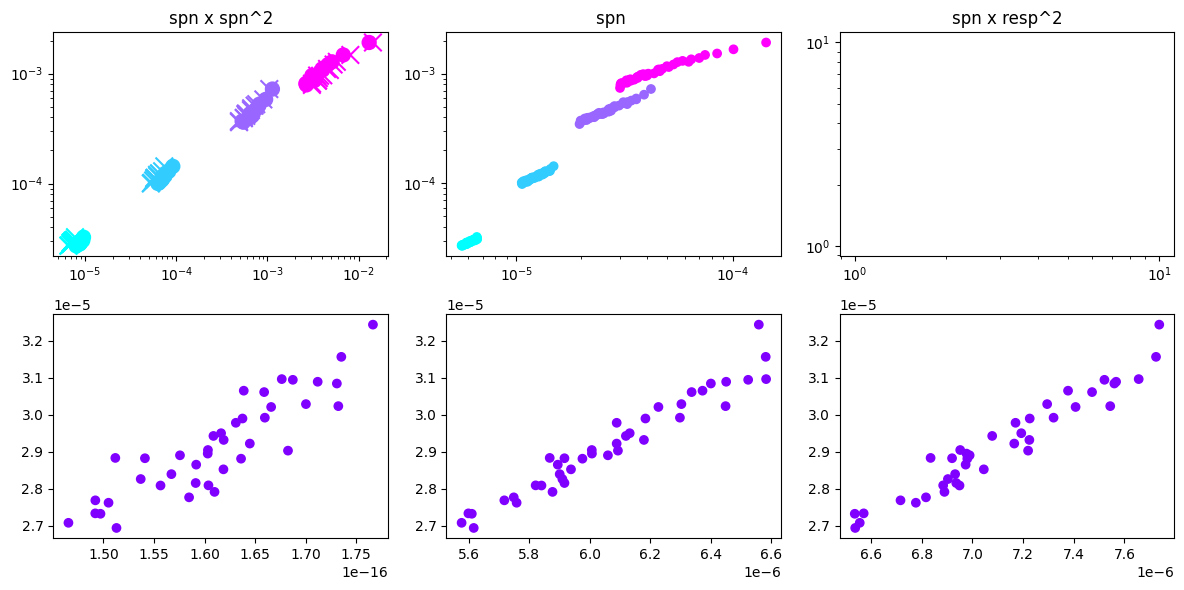

In [97]:
imp.reload(sf)
inet=0
type_J,type_trgt_ipt="random_sym","entire_lrn_eig"
sf.gen_figs_entire_lrn(inet,type_J,type_trgt_ipt,"fulllrnspd_eig_randJ.pdf")

###  rand  in rand J

[0.1 0.2 0.3 0.4 0.5 0.6]


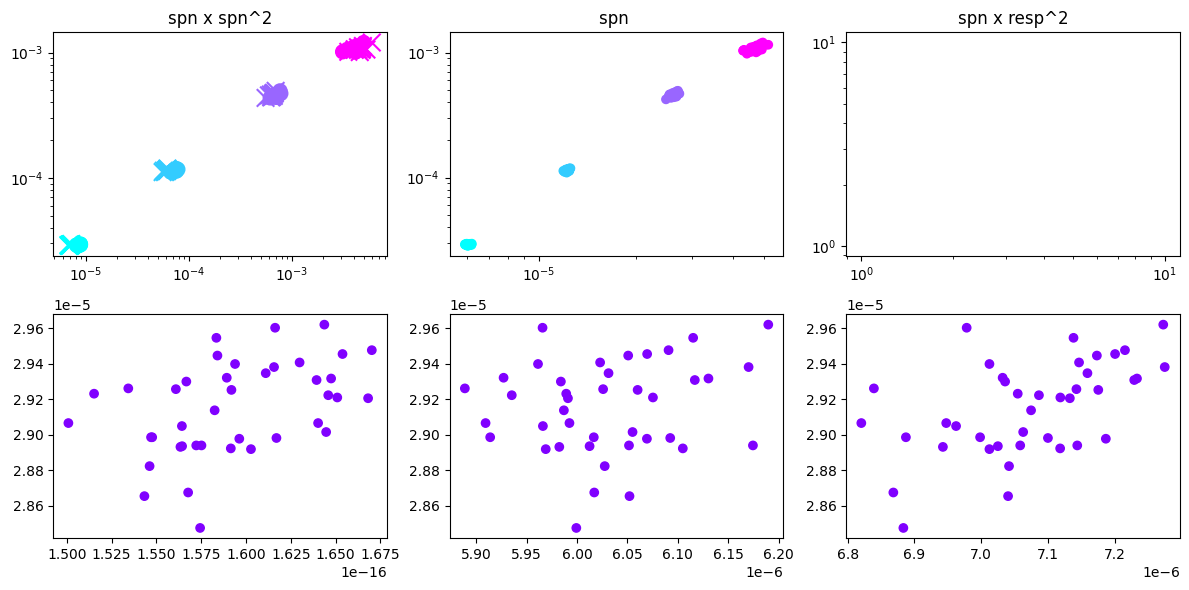

In [98]:
imp.reload(sf)
inet=0
type_J,type_trgt_ipt="random_sym","entire_lrn_random"
sf.gen_figs_entire_lrn(inet,type_J,type_trgt_ipt,"fulllrnspd_rnd_randJ.pdf")

###  rand in emb J 

0.1
[0.6 0.9 1.2 1.4]


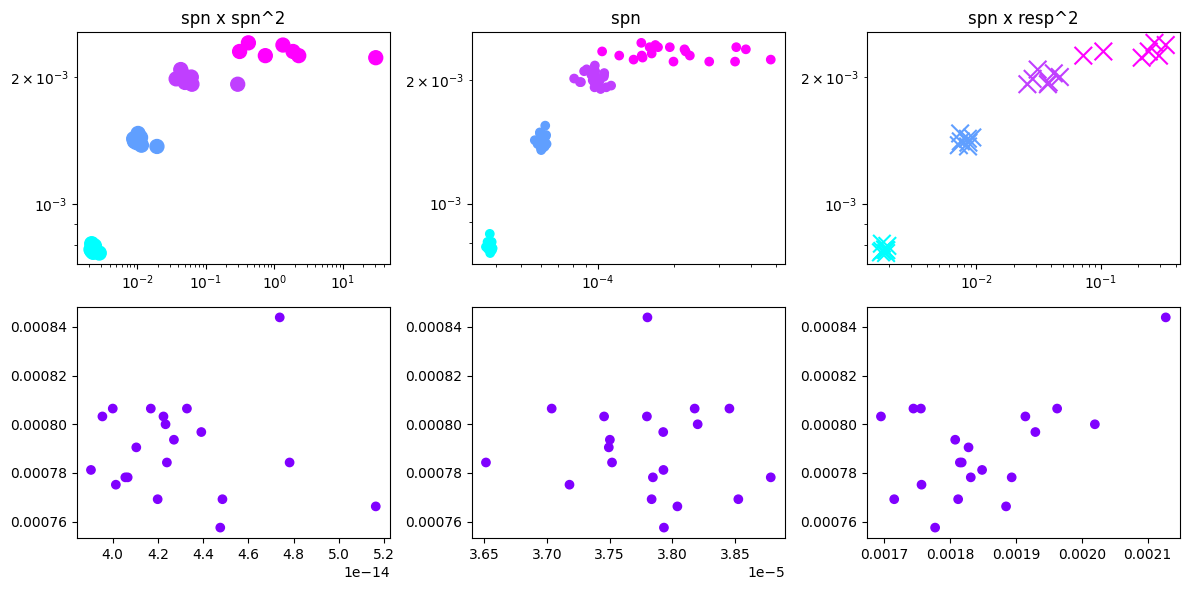

In [11]:
imp.reload(sf)
inet=0
type_J,type_trgt_ipt="preemb","entire_lrn_random_preemb"
alpha=0.1
sf.gen_figs_entire_lrn(inet,type_J,type_trgt_ipt,"fulllrnspd_rnd_embJ.pdf",alpha=alpha,is_logscale=True)

###  trgt in emb J

0.1
[0.6 0.9 1.2 1.4]


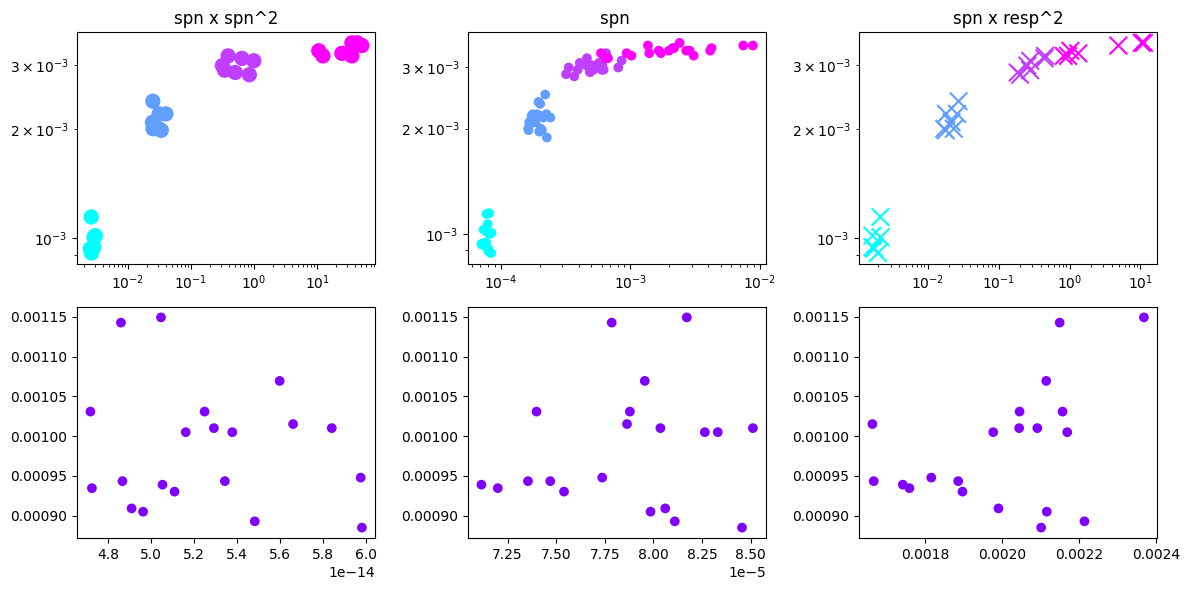

In [12]:
imp.reload(sf)
inet=0
type_J,type_trgt_ipt="preemb","entire_lrn_trgt_preemb"
alpha=0.1
sf.gen_figs_entire_lrn(inet,type_J,type_trgt_ipt,"fulllrnspd_trgt_embJ.pdf",alpha=alpha,is_logscale=True)

###  rand in emb J (alpha dependence)

In [ ]:
imp.reload(sf)

net=0
type_J="preemb"
type_trgt_ipt="entire_lrn_random_preemb"
list_alpha=[0.1,0.2,0.3,0.4,0.5,0.6]
beta=0.6

x1=[]
x2=[]

label_all=[]


for ia,alpha in enumerate(list_alpha):
    tmp=sf.load_fulllrn_data(inet,type_J,type_trgt_ipt,alpha=alpha)
    list_beta=tmp["list_beta"]
    [ipt,trgt]=tmp["ipt_trgt"]
    dyn_label=tmp["dyn_label"]
    dyn_lrn=[tmp["dyn"+str(i)] for i in range(len(dyn_label))]
    t=[i[:,0] for i in dyn_lrn]
    dyn_lrn=[i[:,1:] for i in dyn_lrn]
    list_id=tmp["list_id"]
    Nmap=len(list_id)
    dt=tmp["dt"]
    Tbin=tmp["Tbin"]
    
    tmp1=np.where(dyn_label==beta)
    label_all.append(np.copy(tmp1[0]))
    x1.append([1/(len(dyn_lrn[j])*(dt*Tbin)) for  j in tmp1[0]])
    #invT_alpha.append([ (dyn_lrn[j]@trgt[:,int(dyn_label[j][1])])[-1] for  j in tmp1[0] ] )
    x2.append(sf.get_resp(dyn_lrn,10))
    #x3.append([dyn_lrn[j]@trgt[:,j] for  j in tmp1[0]])

lrnspd_all=dict()
lrnspd_all["lrnspd_emp"]=x1
lrnspd_all["resp"]=x2
lrnspd_all["label"]=label_all


In [ ]:
vmax,vmin=np.max(list_alpha),np.min(list_alpha)
fig=pl.figure(figsize=(12,6))
ax = fig.add_subplot(131)
ax.set_title("spn x spn^2")
ax1=fig.add_subplot(132)
ax1.set_title("spn")
ax2=fig.add_subplot(133)
ax2.set_title("resp")

for ia,alpha in enumerate(list_alpha):
    avevar_spn_trgt=sf.calc_avevar_spn_vec(inet,trgt,[beta],type_J,alpha=alpha)
    avevar_spn_ipt=sf.calc_avevar_spn_vec(inet,ipt,[beta],type_J,alpha=alpha)
    
    y=lrnspd_all["lrnspd_emp"][ia]
    label_tmp=lrnspd_all["label"][ia]
    resp=[np.linalg.norm(lrnspd_all["resp"][ia][j])**2 for  j in label_tmp]
    
    
    x=(beta**3)*avevar_spn_trgt[0]*avevar_spn_ipt[0]**2
    im=ax.scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(y)),cmap="rainbow",marker="x")
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    
    x=beta*avevar_spn_trgt[0]
    im=ax1.scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(y)),cmap="rainbow",marker="x")
    ax1.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax1.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    
    x=beta*avevar_spn_trgt[0]*resp
    im=ax2.scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(y)),cmap="rainbow",marker="x")
    ax2.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax2.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
fig.colorbar(im)
ax1.set_xscale("log")
ax2.set_xscale("log")
ax.set_xscale("log")

pl.savefig("fulllrnspd_rnd_rndJ_alpha.pdf")

###  trgt in embJ (alpha dependence)

In [ ]:
imp.reload(sf)

inet=0
type_J="preemb"
type_trgt_ipt="entire_lrn_trgt_preemb"
list_alpha=[0.1,0.3,0.6]
beta=0.6

x1=[]
x2=[]

label_all=[]


for ia,alpha in enumerate(list_alpha):
    tmp=sf.load_fulllrn_data(inet,type_J,type_trgt_ipt,alpha=alpha)
    list_beta=tmp["list_beta"]
    [ipt,trgt]=tmp["ipt_trgt"]
    dyn_label=tmp["dyn_label"]
    dyn_lrn=[tmp["dyn"+str(i)] for i in range(len(dyn_label))]
    t=[i[:,0] for i in dyn_lrn]
    dyn_lrn=[i[:,1:] for i in dyn_lrn]
    list_id=tmp["list_id"]
    Nmap=len(list_id)
    dt=tmp["dt"]
    Tbin=tmp["Tbin"]
    
    tmp1=np.where(dyn_label==beta)
    label_all.append(np.copy(tmp1[0]))
    x1.append([1/(len(dyn_lrn[j])*(dt*Tbin)) for  j in tmp1[0]])
    #invT_alpha.append([ (dyn_lrn[j]@trgt[:,int(dyn_label[j][1])])[-1] for  j in tmp1[0] ] )
    x2.append(sf.get_resp(dyn_lrn,10))
    #x3.append([dyn_lrn[j]@trgt[:,j] for  j in tmp1[0]])

lrnspd_all=dict()
lrnspd_all["lrnspd_emp"]=x1
lrnspd_all["resp"]=x2
lrnspd_all["label"]=label_all


In [ ]:
#vmax,vmin=np.max(list_alpha),np.min(list_alpha)
vmax,vmin=0.6,0.1
fig=pl.figure(figsize=(12,6))
ax = fig.add_subplot(131)
ax.set_title("spn x spn^2")
ax1=fig.add_subplot(132)
ax1.set_title("spn")
ax2=fig.add_subplot(133)
ax2.set_title("resp")

for ia,alpha in enumerate(list_alpha):
    avevar_spn_trgt=sf.calc_avevar_spn_vec(inet,trgt,[beta],type_J,alpha=alpha)
    avevar_spn_ipt=sf.calc_avevar_spn_vec(inet,ipt,[beta],type_J,alpha=alpha)
    
    y=lrnspd_all["lrnspd_emp"][ia]
    label_tmp=lrnspd_all["label"][ia]
    resp=[np.linalg.norm(lrnspd_all["resp"][ia][j])**2 for  j in label_tmp]
    
    
    x=(beta**3)*avevar_spn_trgt[0]*avevar_spn_ipt[0]**2
    im=ax.scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(y)),cmap="rainbow",marker="x")
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    
    x=beta*avevar_spn_trgt[0]
    im=ax1.scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(y)),cmap="rainbow",marker="x")
    ax1.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax1.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    
    x=beta*avevar_spn_trgt[0]*resp
    im=ax2.scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(y)),cmap="rainbow",marker="x")
    ax2.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax2.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
fig.colorbar(im)
ax1.set_xscale("log")
ax2.set_xscale("log")
ax.set_xscale("log")



pl.savefig("fulllrnspd_trgt_rndJ_alpha.pdf")

In [ ]:
# dat = ipt3

vmax,vmin=np.max(list_alpha),np.min(list_alpha)
fig=pl.figure(figsize=(12,6))
ax = fig.add_subplot(131)
ax.set_title("spn x spn^2")
ax1=fig.add_subplot(132)
ax1.set_title("spn")
ax2=fig.add_subplot(133)
ax2.set_title("resp")

for ia,alpha in enumerate(list_alpha):
    avevar_spn_trgt=sf.calc_avevar_spn_vec(inet,trgt,[beta],type_J,alpha=alpha)
    avevar_spn_ipt=sf.calc_avevar_spn_vec(inet,ipt,[beta],type_J,alpha=alpha)
    
    y=lrnspd_all["lrnspd_emp"][ia]
    label_tmp=lrnspd_all["label"][ia]
    resp=[np.linalg.norm(lrnspd_all["resp"][ia][j])**2 for  j in label_tmp]
    
    
    x=(beta**3)*avevar_spn_trgt[0]*avevar_spn_ipt[0]**2
    im=ax.scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(y)),cmap="rainbow",marker="x")
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    
    x=beta*avevar_spn_trgt[0]
    im=ax1.scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(y)),cmap="rainbow",marker="x")
    ax1.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax1.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    
    x=beta*avevar_spn_trgt[0]*resp
    im=ax2.scatter(x,y,vmin=vmin,vmax=vmax,c=alpha*np.ones(len(y)),cmap="rainbow",marker="x")
    ax2.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    ax2.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
fig.colorbar(im)
ax1.set_xscale("log")
ax2.set_xscale("log")
ax.set_xscale("log")



pl.savefig("fulllrnspd_trgt_rndJ_alpha.pdf")